# ns-3 test results
This notebook takes results from the ns3 tests and plots them.

CAREFUL! cwnd does not translate to throughput, even for a program sending at the full capacity of the cwnd. 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import re
plt.rcParams.update(plt.rcParamsDefault)

def average_cwnd(file_path):
    try:
        data = np.loadtxt(file_path)
        return np.average(data[:,1])
    except: 
        return 0
    

def get_error(file_path):
    match = re.search(r"[ac](0\.\d+?)-", file_path)
    if not match: 
        print(f"Error: Error not found in {file_path}")
        return None
    return float(match.group(1))

def get_rtt(file_path):
    match = re.search(r"-(\d+?\.\d+?)ms",file_path)
    if not match: 
        print(f"Error: Delay not found in {file_path}")
        return None
    return 2*float(match.group(1))
def get_run(file_path):
    match = re.search(r"-(\d+?)-",file_path)
    if not match: 
        print(f"Error: Run not found in {file_path}")
        return None
    return int(match.group(1))
def get_bandwidth(file_path):
    match = re.search(r"-(\d+?[GMK]bps)-",file_path)
    if not match: 
        print(f"Error: Bandwidth not found in {file_path}")
        return None
    return match.group(1)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


#### Plotting in latex

In [14]:
#configure before plotting
plt.rcParams.update(plt.rcParamsDefault)
matplotlib.use("pgf")
matplotlib.rcParams.update(
    {
        # Adjust to your LaTex-Engine
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "axes.unicode_minus": False,
    }
)
filename = "reno0.dat"
save_figure = True


# read file and convert to numpy
data = np.loadtxt(f'./ns3_results/{filename}')
# plot data
fig, axs = plt.subplots(1, 1, figsize=(6,4))
axs.plot(data[:,0],data[:,1])
axs.set_xlabel("time")
axs.set_ylabel("cwnd")
axs.grid()
axs.set_title(r"bandwidth=, loss_probability=, etc...")
fig.suptitle("cwnd of reno with")
if save_figure:
    plt.savefig(f"./figures/ns3_results/{filename}.pgf")
plt.tight_layout()

Text(0.4, 0.95, 'bandwidth: 2000000.0bps \n rtt = 0.092s, packet_error = 1e-07 \n rtt0 = 0.05s')

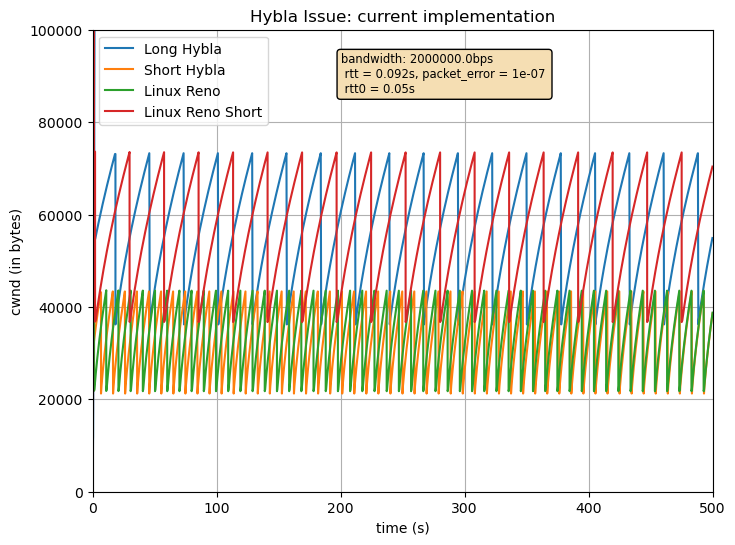

In [3]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
mss = 1000 # in bytes
bandwidth = 2e6 # in bits per second
rtt = 0.092 # in seconds
bdp = (rtt/8)*bandwidth/mss
err = 0.0000001
cca = "Cubic"
data = np.loadtxt(f'../../../Documents/Github/ns-3-dev/results/HyblaIssue/TcpVariantsComparison-cwnd-Hybla.data')
axs.plot(data[:,0],data[:,1], label="Long Hybla")
data = np.loadtxt(f'../../../Documents/Github/ns-3-dev/results/HyblaIssue/TcpVariantsComparison-cwnd-HyblaLong.data')
axs.plot(data[:,0],data[:,1], label="Short Hybla")
data = np.loadtxt(f'../../../Documents/Github/ns-3-dev/results/HyblaIssue/TcpVariantsComparison-cwndLinuxReno.data')
axs.plot(data[:,0],data[:,1], label="Linux Reno")
data = np.loadtxt(f'../../../Documents/Github/ns-3-dev/results/HyblaIssue/TcpVariantsComparison-cwndLinuxRenoshort.data')
axs.plot(data[:,0],data[:,1], label="Linux Reno rtt = ")
# data = np.loadtxt(f'../../../Documents/Github/ns-3-dev/results/HyblaIssue/TcpVariantsComparison-cwnd-NewHybla.data')
# axs.plot(data[:,0],data[:,1], label="New Hybla")
axs.set_xlabel("time (s)")
axs.set_ylabel("cwnd (in bytes)")
axs.set_xlim(0,500)
axs.set_ylim(0,100000)
# place the legend in the top left corner
axs.legend(loc=2)
axs.grid()
axs.set_title(f"Hybla Issue: current implementation")
# data = np.loadtxt(f'../../../Documents/Github/ns-3-dev/TcpVariantsComparison-received.data')
# transmitted_packets = np.sum(data[:,1])/mss
axs.text(0.40, 0.95, f"bandwidth: {bandwidth}bps \n rtt = {rtt}s, packet_error = {err} \n rtt0 = {0.05}s", transform=axs.transAxes, fontsize="small",verticalalignment='top', bbox=props)
#plt.savefig(f"./figures/ns3_results/{cca}-{bandwidth}-{rtt}-{err}.png", dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'hybla')

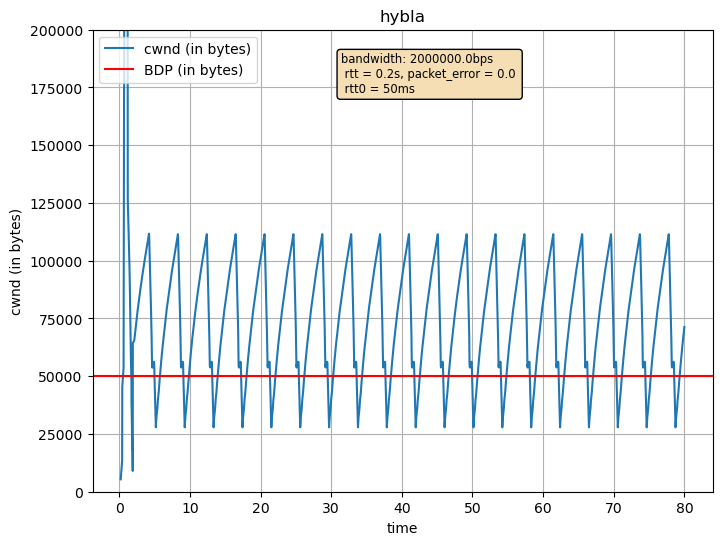

In [17]:
def average_cwnd(file_path):
    try:
        data = np.loadtxt(file_path)
        return np.average(data[int(0.1*len(data[:,1])):,1])
    except: 
        return 0

fig, axs = plt.subplots(1, 1, figsize=(8, 6))
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
mss = 580 # in bytes
bandwidth = 2e6 # in bits
rtt = 0.2 # in seconds
bdp = rtt*bandwidth/8 # in packets
err = 0.0
cca = "hybla"
data = np.loadtxt(f'../../../Documents/Github/ns-3-dev/results/tcp-bulk-send.cwnd')
axs.plot(data[:,0],data[:,1], label="cwnd (in bytes)")
axs.axhline(bdp, label="BDP (in bytes)", color='red')
axs.set_xlabel("time")
axs.set_ylabel("cwnd (in bytes)")
# axs.set_xlim(0,10)
axs.set_ylim(0,bdp*4)
# place the legend in the top left corner
axs.legend(loc=2)
axs.grid()
axs.text(0.40, 0.95, f"bandwidth: {bandwidth}bps \n rtt = {rtt}s, packet_error = {err} \n rtt0 = 50ms", transform=axs.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
axs.set_title(f"{cca}")
#plt.savefig(f"./figures/ns3_results/{cca}-{bandwidth}-{rtt}-{err}.png", dpi=300, bbox_inches='tight')

Text(0.4, 0.95, 'bandwidth: 2000000.0bps \n rtt = 0.702s, packet_error = 1e-07 \n rtt0 = 0.025s')

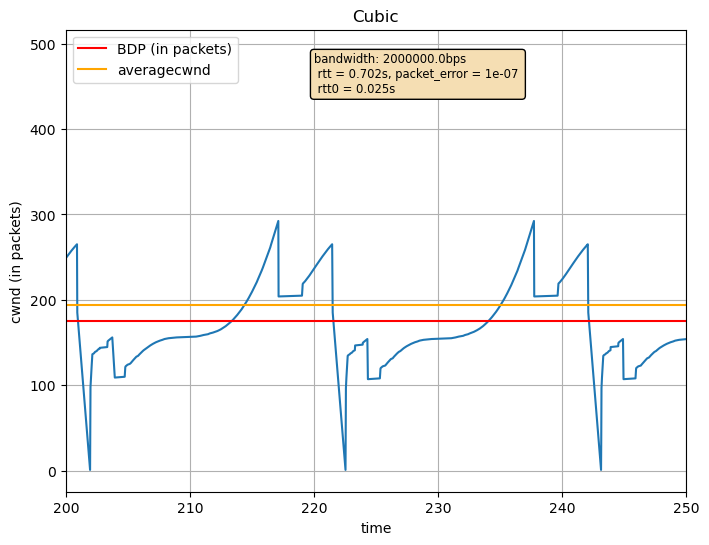

In [121]:
def average_cwnd(file_path):
    try:
        data = np.loadtxt(file_path)
        return np.average(data[int(0.1*len(data[:,1])):,1])
    except: 
        return 0

fig, axs = plt.subplots(1, 1, figsize=(8, 6))
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
mss = 1000 # in bytes
bandwidth = 2e6 # in bits per second
rtt = 0.702 # in seconds
bdp = (rtt/8)*bandwidth/mss
err = 0.0000001
cca = "Cubic"
data = np.loadtxt(f'../../../Documents/Github/ns-3-dev/results/TcpVariantsSat-cwnd.data')
axs.plot(data[:,0],data[:,1]/mss)
axs.axhline(bdp, label="BDP (in packets)", color = 'red')
axs.axhline(average_cwnd(f'../../../Documents/Github/ns-3-dev/results/TcpVariantsSat-cwnd.data')/mss, label="averagecwnd",color = 'orange')
axs.set_xlabel("time")
axs.set_ylabel("cwnd (in packets)")
axs.set_xlim(200,250)
#axs.set_ylim(0,bdp*3)
# place the legend in the top left corner
axs.legend(loc=2)
axs.grid()
axs.set_title(f"{cca}")
# data = np.loadtxt(f'../../../Documents/Github/ns-3-dev/TcpVariantsComparison-received.data')
# transmitted_packets = np.sum(data[:,1])/mss
axs.text(0.40, 0.95, f"bandwidth: {bandwidth}bps \n rtt = {rtt}s, packet_error = {err} \n rtt0 = {0.025}s", transform=axs.transAxes, fontsize="small",verticalalignment='top', bbox=props)
#plt.savefig(f"./figures/ns3_results/{cca}-{bandwidth}-{rtt}-{err}.png", dpi=300, bbox_inches='tight')

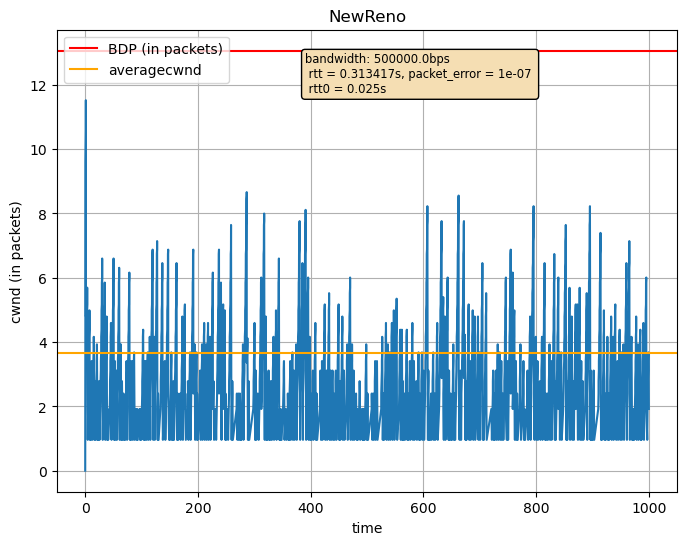

In [93]:
def average_cwnd(file_path):
    try:
        data = np.loadtxt(file_path)
        return np.average(data[int(0.1*len(data[:,1])):,1])
    except: 
        return 0

fig, axs = plt.subplots(1, 1, figsize=(8, 6))
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
mss = 1500 # in bytes
bandwidth = 5e5 # in bits per second
data = np.loadtxt(f'../../../Documents/Github/ns-3-dev/results/tcp_model_comparison/TcpNewReno/TcpNewReno_1e-05_5.000000ms_500Kbps_0-rtt.data')
rtt = max(data[:,1])
#rtt = 0.27
bdp = rtt*bandwidth/(mss*8)
err = 0.0000001
cca = "NewReno"
data = np.loadtxt(f'../../../Documents/Github/ns-3-dev/results/tcp_model_comparison/TcpNewReno/TcpNewReno_1e-05_268.947368ms_500Kbps_0-cwnd.data')
axs.plot(data[:,0],data[:,1]/mss)
axs.axhline(bdp, label="BDP (in packets)", color = 'red')
axs.axhline(average_cwnd(f'../../../Documents/Github/ns-3-dev/results/tcp_model_comparison/TcpNewReno/TcpNewReno_1e-05_268.947368ms_500Kbps_0-cwnd.data')/mss, label="averagecwnd",color = 'orange')
axs.set_xlabel("time")
axs.set_ylabel("cwnd (in packets)")
#axs.set_xlim(200,250)
#axs.set_ylim(0,bdp*3)
# place the legend in the top left corner
axs.legend(loc=2)
axs.grid()
axs.set_title(f"{cca}")
# data = np.loadtxt(f'../../../Documents/Github/ns-3-dev/TcpVariantsComparison-received.data')
# transmitted_packets = np.sum(data[:,1])/mss
axs.text(0.40, 0.95, f"bandwidth: {bandwidth}bps \n rtt = {rtt}s, packet_error = {err} \n rtt0 = {0.025}s", transform=axs.transAxes, fontsize="small",verticalalignment='top', bbox=props)
plt.show()
#plt.savefig(f"./figures/ns3_results/{cca}-{bandwidth}-{rtt}-{err}.png", dpi=300, bbox_inches='tight')

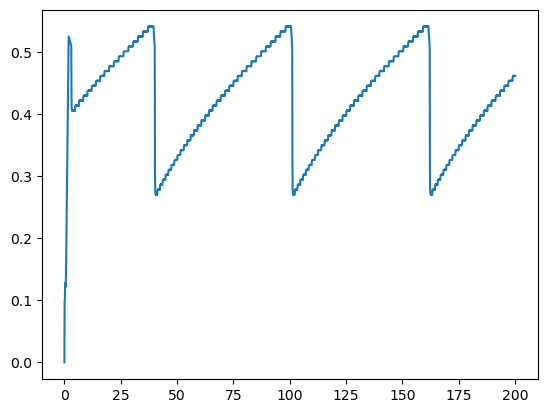

0.44093899999999997


In [242]:
data = np.loadtxt(f'../../../Documents/Github/ns-3-dev/TcpVariantsComparison-rtt.data')
plt.plot(data[:,0],data[:,1])
plt.show()
print(max(data[:,1])-0.1)

In [12]:
0.9*1500/0.5

2700.0

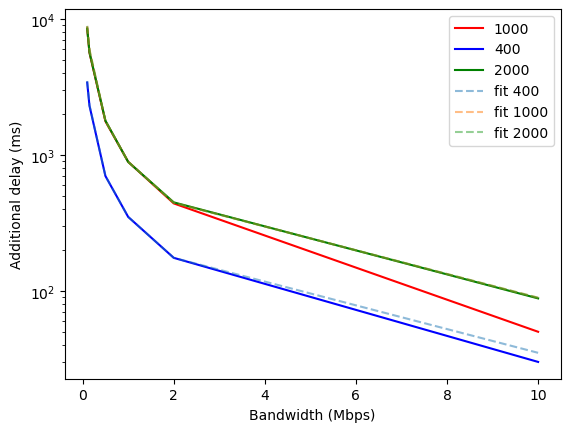

In [211]:
x = np.array([0.1,0.15,0.5,1,2,10])
y2000 = np.array([8888,6084,2190,1290,850,490])-402
y1000 = np.array([8520,5650,1770,890,440,50])
y400 = np.array([3410,2300,700,350,175,30])
plt.plot(x,y1000,'r',label='1000')
plt.plot(x,y400,'b',label='400')
plt.plot(x,y2000,'g',label='2000')
plt.xlabel('Bandwidth (Mbps)')
plt.ylabel('Additional delay (ms)')
plt.plot(x,350/x, label='fit 400', linestyle='--',alpha=0.5)
plt.plot(x,890/x, label='fit 1000', linestyle='--',alpha=0.5)
plt.plot(x,890/x, label='fit 2000', linestyle='--',alpha=0.5)
plt.legend()
plt.semilogy()
plt.show()

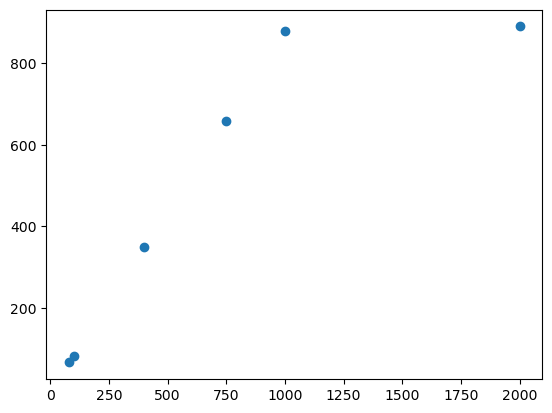

In [224]:
x = np.array([80,100,400,750,1000,2000])
y = np.array([66,82,350,658,880,890])
plt.plot(x,y,'o')
plt.show()

## Plotting different ns3 tests

Our scenarios are:
Bandwidth of 100Kbps and 1Mbps
Error rates between 1e-5 and 0.9
MSS is 1000 Bytes = 8000 bits
RTTs of 10ms and 600ms

| BDP   | 100Kbps            | 1Mbps              |
|-------|--------------------|--------------------|
| 10ms  | 1Kb = 1/8packet    | 10Kb = 5/4 packets |
| 600ms | 60Kb = 7.5 packets | 600Kb = 75 packets |

We want the following plots:
* Average cwnd as a function of the packet loss probability
* Tracing examples of cwnd(t) 

Data received in the first plot (1Mbps, RTT= 0.010s): 78812.0 packets in 1000s so a throughput of 78.812 packets per seconds
In comparison, the maximum number of packets 1000Bytes we can send in 1000s with a bandwidth of 1Mbps is: 125000.0 packets, or 125.0 packets/s
This should also be consistent with BDP*number of cycles. There are 1000s/RTT = 100000.0 cycles available each yealding 1 BDP =10.0packets
Given, the average cwnd exceeds the BDP, we can safely assume the application doesn't send a full cwnd every RTT
We can also see that assuming a full cwnd is sent at every RTT clearly upper bounds the throughput
Data received in the second plot (1Mbps, RTT= 0.6s): 68112.0 packets in 1000s so a throughput of 68.112 packets per seconds
In comparison, the maximum number of packets 1000Bytes we can send in 1000s with a bandwidth of 1Mbps is: 125000.0 packets, or 125.0 packets/s
501042.56


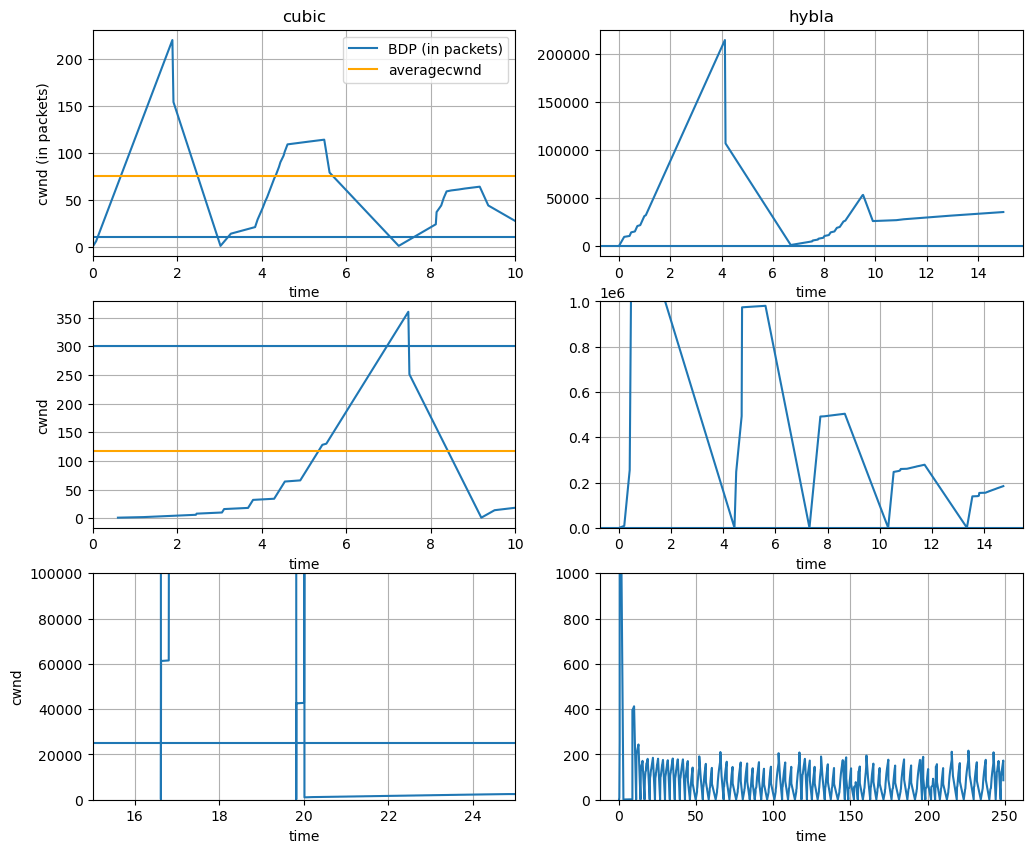

In [40]:
#configure before plotting

filename1 = f"09.08.23/TcpCubic/TcpCubic0.000010-5.000000ms-1Mbps-0.cwnd"
filename2 = f"09.08.23/TcpCubic/TcpCubic0.000010-300.000000ms-1Mbps-0.cwnd"
filename3 = f"09.08.23/TcpCubic/TcpCubic0.006310-300.000000ms-1Mbps-0.cwnd"
filename4 = f"09.08.23/withQueue/TcpCubic0.000010-5.000000ms-1Mbps-0.cwnd"
filename5 = f"09.08.23/withQueue/TcpCubic0.000010-300.000000ms-1Mbps-0bq.cwnd"
filename6 = f"09.08.23/TcpHybla/TcpHybla0.006310-300.000000ms-1Mbps-0.cwnd"
mss = 1000 # in bytes
bandwidth = 1000000 # in bites per second
# plot data
data = np.loadtxt(f'./ns3_results/09.08.23/TcpCubic/TcpCubic0.000010-5.000000ms-1Mbps-0-received.data')
print(f"Data received in the first plot (1Mbps, RTT= 0.010s): {np.sum(data[:,1])/1000} packets in 1000s so a throughput of {np.sum(data[:,1])/1000/1000} packets per seconds")
print(f"In comparison, the maximum number of packets 1000Bytes we can send in 1000s with a bandwidth of 1Mbps is: {1000000*1000/(8*1000)} packets, or {1000000*1000/(8*1000)/1000} packets/s")
print(f"This should also be consistent with BDP*number of cycles. There are 1000s/RTT = {1000/0.01} cycles available each yealding 1 BDP ={0.01*1000000/mss}packets")
print(f"Given, the average cwnd exceeds the BDP, we can safely assume the application doesn't send a full cwnd every RTT")
print(f"We can also see that assuming a full cwnd is sent at every RTT clearly upper bounds the throughput")
fig, axs = plt.subplots(3, 2, figsize=(12,10))
data = np.loadtxt(f'./ns3_results/{filename1}')
axs[0,0].plot(data[:,0],data[:,1]/mss)
axs[0,0].axhline(0.01*1000000/mss, label="BDP (in packets)")
axs[0,0].axhline(average_cwnd(f'./ns3_results/{filename1}')/mss, label="averagecwnd",color = 'orange')
axs[0,0].set_xlabel("time")
axs[0,0].set_ylabel("cwnd (in packets)")
axs[0,0].set_xlim(0,10)
axs[0,0].legend()
axs[0,0].grid()
axs[0,0].set_title("cubic")
data = np.loadtxt(f'./ns3_results/TcpVariantsComparison-cwnd.data')
axs[0,1].plot(data[:,0],data[:,1])
axs[0,1].axhline(0.09*1000000/mss, label="BDP (in packets)")
axs[0,1].set_xlabel("time")
axs[0,1].grid()
axs[0,1].set_title("hybla")
data = np.loadtxt(f'./ns3_results/09.08.23/TcpCubic/TcpCubic0.000010-300.000000ms-1Mbps-0-received.data')
print(f"Data received in the second plot (1Mbps, RTT= 0.6s): {np.sum(data[:,1])/1000} packets in 1000s so a throughput of {np.sum(data[:,1])/1000/1000} packets per seconds")
print(f"In comparison, the maximum number of packets 1000Bytes we can send in 1000s with a bandwidth of 1Mbps is: {1000000*1000/(8*1000)} packets, or {1000000*1000/(8*1000)/1000} packets/s")
data = np.loadtxt(f'./ns3_results/{filename2}')
axs[1,0].plot(data[:,0],data[:,1]/mss)
axs[1,0].axhline(0.3*1000000/mss, label="BDP (in packets)")
axs[1,0].axhline(average_cwnd(f'./ns3_results/{filename2}')/mss, label="averagecwnd",color = 'orange')
axs[1,0].set_xlim(0,10)
axs[1,0].set_xlabel("time")
axs[1,0].set_ylabel("cwnd")
axs[1,0].grid()
# data = np.loadtxt(f'./ns3_results/{filename5}')
# axs[1,1].plot(data[:,0],data[:,1]/mss)
# data = np.loadtxt(f'./ns3_results/09.08.23/withQueue/TcpCubic0.000010-300.000000ms-1Mbps-0.cwnd')
# axs[1,1].plot(data[:,0],data[:,1]/mss)
# data = np.loadtxt(f'./ns3_results/09.08.23/withQueue/TcpCubic0.000010-300.000000ms-1Mbps-0lq.cwnd')
# axs[1,1].plot(data[:,0],data[:,1]/mss)
data = np.loadtxt(f'./ns3_results/TcpVariantsComparison-cwndNewRho.data')
axs[1,1].plot(data[:,0],data[:,1])
axs[1,1].axhline(0.2*1000000/mss, label="BDP (in packets)")
axs[1,1].set_ylim(0,1e6)
axs[1,1].set_xlabel("time")
axs[1,1].grid()
data = np.loadtxt(f'./ns3_results/TcpVariantsComparison-cwnd1Gbps2.data')
axs[2,0].plot(data[:,0],data[:,1]/mss)
axs[2,0].axhline(0.201*1e9/mss/8, label="BDP (in packets)")
axs[2,0].set_ylim(0,1e5)
axs[2,0].set_xlim(15,25)
axs[2,0].set_xlabel("time")
axs[2,0].set_ylabel("cwnd")
axs[2,0].grid()
data = np.loadtxt(f'./ns3_results/TcpVariantsComparison-cwndNoQueue1Mbps.data')
axs[2,1].plot(data[:,0],data[:,1]/mss)
data = np.loadtxt(f'./ns3_results/TcpVariantsComparison-receivedNoQueue1Mbps.data')
print(np.sum(data[:,1])*8/250)
axs[2,1].set_ylim(0,1e3)
axs[2,1].set_xlabel("time")
axs[2,1].grid()
plt.show()

/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2857/117263190.py:12: UserWarning: loadtxt: input contained no data: "./ns3_results/09.08.23/TcpCubic/TcpCubic0.794328-5.000000ms-1Mbps-1.cwnd"
  data = np.loadtxt(file_path)
/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2857/117263190.py:12: UserWarning: loadtxt: input contained no data: "./ns3_results/09.08.23/TcpCubic/TcpCubic0.794328-5.000000ms-1Mbps-0.cwnd"
  data = np.loadtxt(file_path)
/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2857/117263190.py:12: UserWarning: loadtxt: input contained no data: "./ns3_results/09.08.23/TcpCubic/TcpCubic0.794328-5.000000ms-100Kbps-1.cwnd"
  data = np.loadtxt(file_path)
/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2857/117263190.py:12: UserWarning: loadtxt: input contained no data: "./ns3_results/09.08.23/TcpCubic/TcpCubic0.794328-300.000000ms-1Mbps-1.cwnd"
  data = np.loadtxt(file_path)
/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2

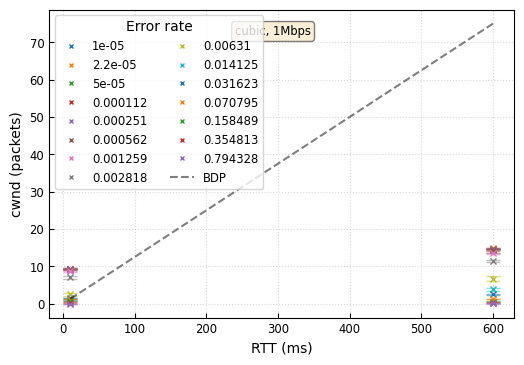

In [31]:
def get_run(file_path):
    match = re.search(r"-(\d+?).",file_path)
    if not match: 
        print(f"Error: Run not found in {file_path}")
        return None

# This is a new test where I deleted all the queues on the network
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 1000*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "1Mbps"
bdw = 1e6
cca = "cubic"
folder_path = "./ns3_results/09.08.23/TcpCubic/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    if not filename.endswith(".cwnd"):
        continue
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(f'{folder_path}{filename}')
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    results[bandwidth][error][rtt].append(average_cwnd(f'{folder_path}{filename}'))

fig, ax = plt.subplots(1,1,figsize=(6,4))
# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        points[i,:] = rtt , np.average(results[bw][error][rtt])/mtu, np.min(results[bw][error][rtt])/mtu, np.max(results[bw][error][rtt])/mtu
    points = points[points[:,0].argsort()]
    ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1],label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
ax.plot(points[:,0],bdw*points[:,0]/1000/mtu,linestyle='--',color='black', alpha = 0.5,label="BDP")
# ax.set_ylim(0, 30)
ax.text(0.40, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("cwnd (packets)")
plt.show()

/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2857/117263190.py:12: UserWarning: loadtxt: input contained no data: "./ns3_results/09.08.23/TcpCubic/TcpCubic0.794328-5.000000ms-1Mbps-1.cwnd"
  data = np.loadtxt(file_path)
/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2857/117263190.py:12: UserWarning: loadtxt: input contained no data: "./ns3_results/09.08.23/TcpCubic/TcpCubic0.794328-5.000000ms-1Mbps-0.cwnd"
  data = np.loadtxt(file_path)
/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2857/117263190.py:12: UserWarning: loadtxt: input contained no data: "./ns3_results/09.08.23/TcpCubic/TcpCubic0.794328-5.000000ms-100Kbps-1.cwnd"
  data = np.loadtxt(file_path)
/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2857/117263190.py:12: UserWarning: loadtxt: input contained no data: "./ns3_results/09.08.23/TcpCubic/TcpCubic0.794328-300.000000ms-1Mbps-1.cwnd"
  data = np.loadtxt(file_path)
/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2

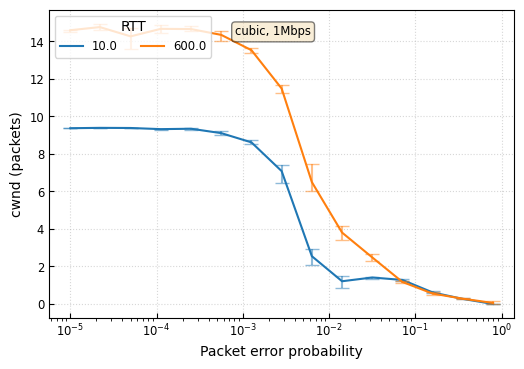

In [35]:
def get_run(file_path):
    match = re.search(r"-(\d+?).",file_path)
    if not match: 
        print(f"Error: Run not found in {file_path}")
        return None

# This is a new test where I deleted all the queues on the network
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 1000*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "1Mbps"
bdw = 1e6
cca = "cubic"
folder_path = "./ns3_results/09.08.23/TcpCubic/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    if not filename.endswith(".cwnd"):
        continue
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(f'{folder_path}{filename}')
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if rtt not in results[bandwidth]:
        results[bandwidth][rtt] = {}
    if error not in results[bandwidth][rtt]:
        results[bandwidth][rtt][error] = []
    results[bandwidth][rtt][error].append(average_cwnd(f'{folder_path}{filename}'))

fig, ax = plt.subplots(1,1,figsize=(6,4))
# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,rtt in enumerate(results[bw]):
    points = np.zeros((len(results[bw][rtt]),4))
    for i, error in enumerate(results[bw][rtt]):
        points[i,:] = error , np.average(results[bw][rtt][error])/mtu, np.min(results[bw][rtt][error])/mtu, np.max(results[bw][rtt][error])/mtu
    points = points[points[:,0].argsort()]
    ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.semilogx(points[:,0],points[:,1],label=rtt,color=my_colours[j%len(my_colours)])
# ax.set_ylim(0, 30)
ax.text(0.40, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="RTT",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("Packet error probability")
ax.set_ylabel("cwnd (packets)")
plt.show()

/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2857/117263190.py:12: UserWarning: loadtxt: input contained no data: "./ns3_results/09.08.23/TcpCubic/TcpCubic0.794328-5.000000ms-1Mbps-1.cwnd"
  data = np.loadtxt(file_path)
/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2857/117263190.py:12: UserWarning: loadtxt: input contained no data: "./ns3_results/09.08.23/TcpCubic/TcpCubic0.794328-5.000000ms-1Mbps-0.cwnd"
  data = np.loadtxt(file_path)
/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2857/117263190.py:12: UserWarning: loadtxt: input contained no data: "./ns3_results/09.08.23/TcpCubic/TcpCubic0.794328-5.000000ms-100Kbps-1.cwnd"
  data = np.loadtxt(file_path)
/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2857/117263190.py:12: UserWarning: loadtxt: input contained no data: "./ns3_results/09.08.23/TcpCubic/TcpCubic0.794328-300.000000ms-1Mbps-1.cwnd"
  data = np.loadtxt(file_path)
/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2

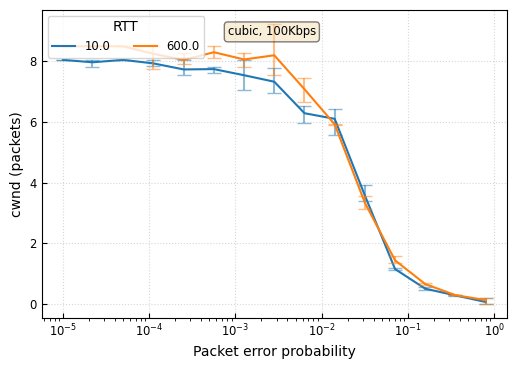

In [37]:
def get_run(file_path):
    match = re.search(r"-(\d+?).",file_path)
    if not match: 
        print(f"Error: Run not found in {file_path}")
        return None

# This is a new test where I deleted all the queues on the network
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 1000*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "100Kbps"
bdw = 1e5
cca = "cubic"
folder_path = "./ns3_results/09.08.23/TcpCubic/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    if not filename.endswith(".cwnd"):
        continue
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(f'{folder_path}{filename}')
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if rtt not in results[bandwidth]:
        results[bandwidth][rtt] = {}
    if error not in results[bandwidth][rtt]:
        results[bandwidth][rtt][error] = []
    results[bandwidth][rtt][error].append(average_cwnd(f'{folder_path}{filename}'))

fig, ax = plt.subplots(1,1,figsize=(6,4))
# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,rtt in enumerate(results[bw]):
    points = np.zeros((len(results[bw][rtt]),4))
    for i, error in enumerate(results[bw][rtt]):
        points[i,:] = error , np.average(results[bw][rtt][error])/mtu, np.min(results[bw][rtt][error])/mtu, np.max(results[bw][rtt][error])/mtu
    points = points[points[:,0].argsort()]
    ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.semilogx(points[:,0],points[:,1],label=rtt,color=my_colours[j%len(my_colours)])
# ax.set_ylim(0, 30)
ax.text(0.40, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="RTT",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("Packet error probability")
ax.set_ylabel("cwnd (packets)")
plt.show()

/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2857/117263190.py:12: UserWarning: loadtxt: input contained no data: "./ns3_results/09.08.23/TcpHybla/TcpHybla0.794328-5.000000ms-1Mbps-2.cwnd"
  data = np.loadtxt(file_path)
/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2857/117263190.py:12: UserWarning: loadtxt: input contained no data: "./ns3_results/09.08.23/TcpHybla/TcpHybla0.794328-5.000000ms-100Kbps-0.cwnd"
  data = np.loadtxt(file_path)
/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2857/117263190.py:12: UserWarning: loadtxt: input contained no data: "./ns3_results/09.08.23/TcpHybla/TcpHybla0.794328-5.000000ms-100Kbps-2.cwnd"
  data = np.loadtxt(file_path)


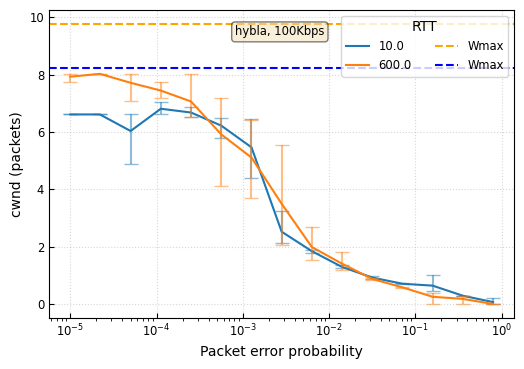

In [46]:
def get_run(file_path):
    match = re.search(r"-(\d+?).",file_path)
    if not match: 
        print(f"Error: Run not found in {file_path}")
        return None

# This is a new test where I deleted all the queues on the network
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 1000*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "100Kbps"
bdw = 1e5
cca = "hybla"
folder_path = "./ns3_results/09.08.23/TcpHybla/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    if not filename.endswith(".cwnd"):
        continue
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(f'{folder_path}{filename}')
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if rtt not in results[bandwidth]:
        results[bandwidth][rtt] = {}
    if error not in results[bandwidth][rtt]:
        results[bandwidth][rtt][error] = []
    results[bandwidth][rtt][error].append(average_cwnd(f'{folder_path}{filename}'))

fig, ax = plt.subplots(1,1,figsize=(6,4))
# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,rtt in enumerate(results[bw]):
    points = np.zeros((len(results[bw][rtt]),4))
    for i, error in enumerate(results[bw][rtt]):
        points[i,:] = error , np.average(results[bw][rtt][error])/mtu, np.min(results[bw][rtt][error])/mtu, np.max(results[bw][rtt][error])/mtu
    points = points[points[:,0].argsort()]
    ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.semilogx(points[:,0],points[:,1],label=rtt,color=my_colours[j%len(my_colours)])
# ax.set_ylim(0, 30)
ax.axhline(y=8.3*(2/1.7), color='orange', linestyle='--', label="Wmax")
ax.axhline(y=7*(2/1.7), color='b', linestyle='--', label="Wmax")
ax.text(0.40, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="RTT",loc='upper right',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("Packet error probability")
ax.set_ylabel("cwnd (packets)")
plt.show()

/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2857/117263190.py:12: UserWarning: loadtxt: input contained no data: "./ns3_results/09.08.23/TcpHybla/TcpHybla0.794328-5.000000ms-1Mbps-2.cwnd"
  data = np.loadtxt(file_path)
/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2857/117263190.py:12: UserWarning: loadtxt: input contained no data: "./ns3_results/09.08.23/TcpHybla/TcpHybla0.794328-5.000000ms-100Kbps-0.cwnd"
  data = np.loadtxt(file_path)
/var/folders/q9/dkbwmmlj0m9f8vn6_gprn1p40000gn/T/ipykernel_2857/117263190.py:12: UserWarning: loadtxt: input contained no data: "./ns3_results/09.08.23/TcpHybla/TcpHybla0.794328-5.000000ms-100Kbps-2.cwnd"
  data = np.loadtxt(file_path)


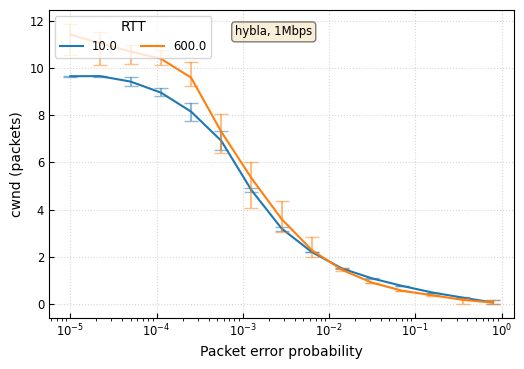

In [39]:
def get_run(file_path):
    match = re.search(r"-(\d+?).",file_path)
    if not match: 
        print(f"Error: Run not found in {file_path}")
        return None

# This is a new test where I deleted all the queues on the network
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 1000*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "1Mbps"
bdw = 1e6
cca = "hybla"
folder_path = "./ns3_results/09.08.23/TcpHybla/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    if not filename.endswith(".cwnd"):
        continue
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(f'{folder_path}{filename}')
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if rtt not in results[bandwidth]:
        results[bandwidth][rtt] = {}
    if error not in results[bandwidth][rtt]:
        results[bandwidth][rtt][error] = []
    results[bandwidth][rtt][error].append(average_cwnd(f'{folder_path}{filename}'))

fig, ax = plt.subplots(1,1,figsize=(6,4))
# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,rtt in enumerate(results[bw]):
    points = np.zeros((len(results[bw][rtt]),4))
    for i, error in enumerate(results[bw][rtt]):
        points[i,:] = error , np.average(results[bw][rtt][error])/mtu, np.min(results[bw][rtt][error])/mtu, np.max(results[bw][rtt][error])/mtu
    points = points[points[:,0].argsort()]
    ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.semilogx(points[:,0],points[:,1],label=rtt,color=my_colours[j%len(my_colours)])
# ax.set_ylim(0, 30)
ax.text(0.40, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="RTT",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("Packet error probability")
ax.set_ylabel("cwnd (packets)")
plt.show()

Theoretical maximum cwnd for 500Kbps = 480packets/s (MSS= 1040*b) bottleneck link with RTT = 600ms (=2*300ms) is  0.2403846153846154 packets


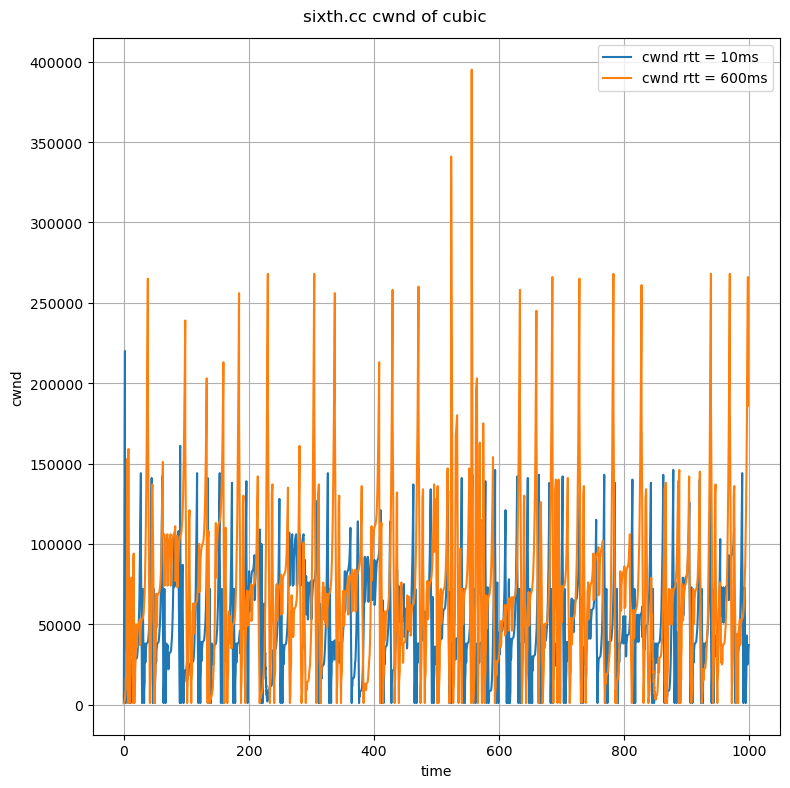

average cwnd = 114352.99853729887
Bandwidth Delay Product = 75000.0 bytes


In [135]:
# read file and convert to numpy
# data = np.loadtxt(f'ns3_results/08.08.23/TcpHybla0.000001-300.000000ms-1Mbps-0.cwnd')
# plot data
bandwidth = 1e6
delay = 0.3*2
bdp = bandwidth*delay
rtt = 2*0.01
mtu = 1040*8
print("Theoretical maximum cwnd for 500Kbps = 480packets/s (MSS= 1040*b) bottleneck link with RTT = 600ms (=2*300ms) is ", 1e5*rtt/mtu, "packets")
fig, axs = plt.subplots(1, 1, figsize=(8,8))
# axs.plot(data[:,0],data[:,1], label="cwnd")
# received_data = np.loadtxt(f"./ns3_results/07.08.23/TcpCubic0.001000-5.000000ms-10Kbps-1-received.data")
# axs.plot(received_data[:,0],np.cumsum(received_data[:,1]/mtu*8), label="received data")
# bulksender_data = np.loadtxt(f'ns3_results/08.08.23/BulkSendHelper/TcpCubic0.000001-300.000000ms-1Mbps-0.cwnd')
# axs.plot(bulksender_data[:,0],bulksender_data[:,1], label="cwnd (BulkSendHelper)")
bulksender_data = np.loadtxt(f'ns3_results/08.08.23/BulkSendHelperLongQueue/TcpCubic0.000001-5.000000ms-1Mbps-0.cwnd')
axs.plot(bulksender_data[:,0],bulksender_data[:,1], label="cwnd rtt = 10ms")
bulksender_data = np.loadtxt(f'ns3_results/08.08.23/BulkSendHelperLongQueue/TcpCubic0.000001-300.000000ms-1Mbps-0.cwnd')
axs.plot(bulksender_data[:,0],bulksender_data[:,1], label="cwnd rtt = 600ms")
# received_data = np.loadtxt(f'ns3_results/08.08.23/BulkSendHelperLongQueue/TcpCubic0.000001-300.000000ms-1Mbps-0-received.data')
# axs.plot(received_data[:,0],np.cumsum(received_data[:,1]), label="received data (BulkSendHelper)")
axs.set_xlabel("time")
axs.set_ylabel("cwnd")
axs.legend()
axs.grid()
fig.suptitle("sixth.cc cwnd of cubic")
plt.tight_layout()
plt.show()
print(f"average cwnd = {np.average(bulksender_data[:,1])}")
print(f"Bandwidth Delay Product = {bdp/8} bytes")
# print(f"average sending rate = {np.average(data[:,1])/rtt} bps, total data transmitted = {np.average(data[:,1])/rtt*data[-1,0]} bits = {np.average(data[:,1])/rtt*data[-1,0]/mtu}packets")

Theoretical maximum cwnd for 500Kbps = 480packets/s (MSS= 1040*b) bottleneck link with RTT = 600ms (=2*300ms) is  0.2403846153846154 packets


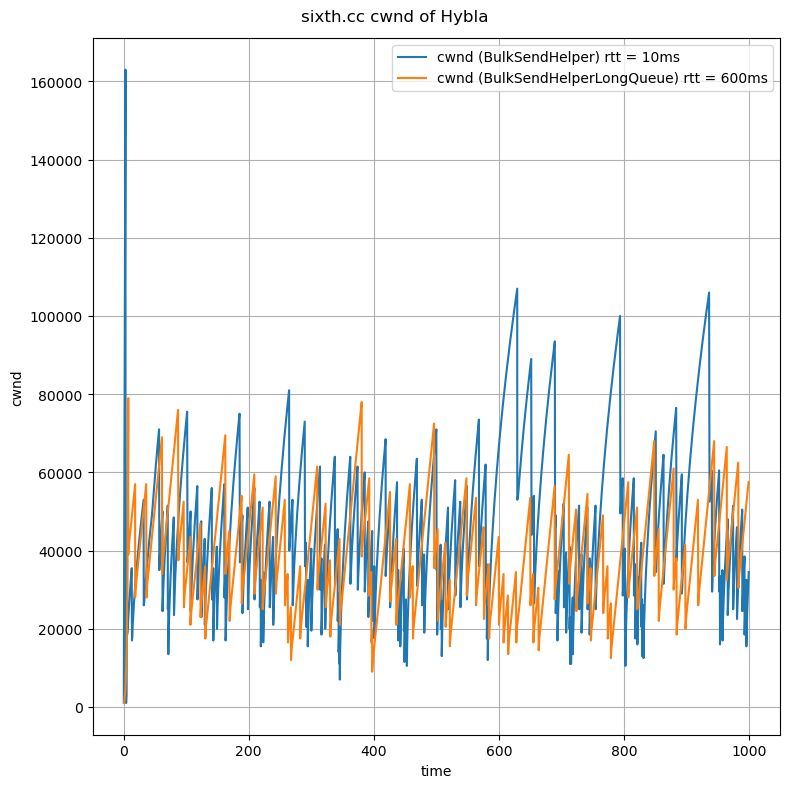

average cwnd = 317277.44982290437
Bandwidth Delay Product = 600000.0 bits


In [133]:
bandwidth = 1e6
delay = 0.3*2
bdp = bandwidth*delay
rtt = 2*0.01
mtu = 1040*8
print("Theoretical maximum cwnd for 500Kbps = 480packets/s (MSS= 1040*b) bottleneck link with RTT = 600ms (=2*300ms) is ", 1e5*rtt/mtu, "packets")
fig, axs = plt.subplots(1, 1, figsize=(8,8))
# read file and convert to numpy
#data = np.loadtxt(f'ns3_results/08.08.23/TcpHybla0.000001-300.000000ms-1Mbps-0.cwnd')
#axs.plot(data[:,0],data[:,1], label="cwnd")
# received_data = np.loadtxt(f"./ns3_results/07.08.23/TcpHybla0.001000-5.000000ms-10Kbps-1-received.data")
# axs.plot(received_data[:,0],np.cumsum(received_data[:,1]/mtu*8), label="received data")
bulksender_data = np.loadtxt(f'ns3_results/08.08.23/BulkSendHelperLongQueue/TcpHybla0.000001-5.000000ms-1Mbps-0.cwnd')
axs.plot(bulksender_data[:,0],bulksender_data[:,1], label="cwnd (BulkSendHelper) rtt = 10ms")
bulksender_data = np.loadtxt(f'ns3_results/08.08.23/BulkSendHelperLongQueue/TcpHybla0.000001-300.000000ms-1Mbps-0.cwnd')
axs.plot(bulksender_data[:,0],bulksender_data[:,1], label="cwnd (BulkSendHelperLongQueue) rtt = 600ms")
#received_data = np.loadtxt(f'ns3_results/08.08.23/BulkSendHelperLongQueue/TcpHybla0.000001-300.000000ms-1Mbps-0-received.data')
#axs.plot(received_data[:,0],np.cumsum(received_data[:,1]), label="received data (BulkSendHelper)")
axs.set_xlabel("time")
axs.set_ylabel("cwnd")
axs.legend()
axs.grid()
fig.suptitle("sixth.cc cwnd of Hybla")
plt.tight_layout()
plt.show()
print(f"average cwnd = {np.average(bulksender_data[:,1])*8}")
print(f"Bandwidth Delay Product = {bdp} bits")
# print(f"average sending rate = {np.average(data[:,1])/rtt} bps, total data transmitted = {np.average(data[:,1])/rtt*data[-1,0]} bits = {np.average(data[:,1])/rtt*data[-1,0]/mtu}packets")

theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  187.5 packets
theoretical maximum cwnd for 500Kbps = 156packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  93.75 packets


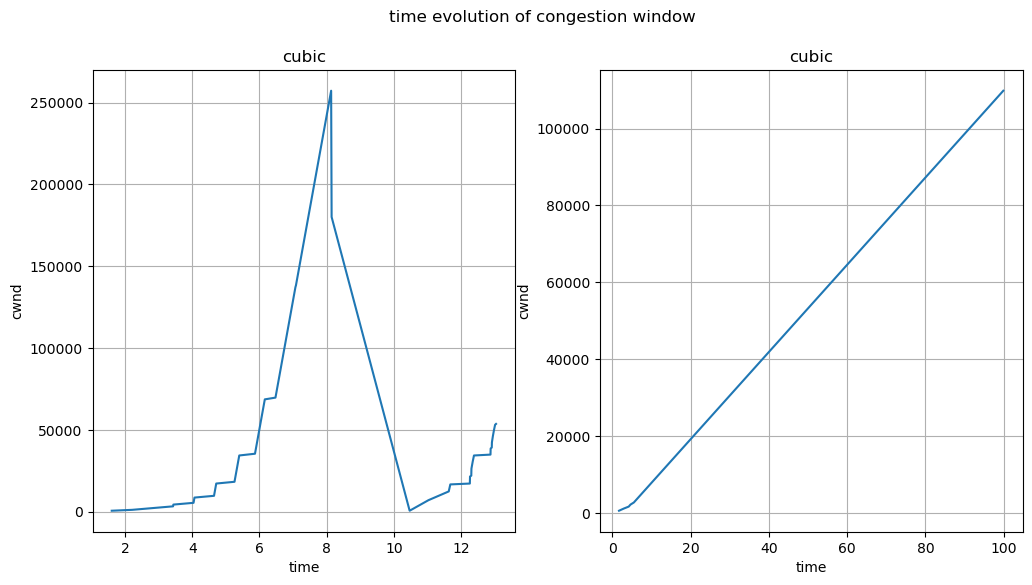

In [107]:
#configure before plotting
filename1 = "08.08.23/TcpCubic0.000001-300.000000ms-1Mbps-0.cwnd"
filename2 = "08.08.23/TcpCubic0.000001-300.000000ms-10Kbps-0.cwnd"
mtu = 1040*8 # in bits
mss = (400-40) *8 # in bits
bandwidth = 1000000 # in bits per second
# read file and convert to numpy
print("theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", 1e6*0.6/mtu, "packets")
print("theoretical maximum cwnd for 500Kbps = 156packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", 5e5*0.6/mtu, "packets")
data = np.loadtxt(f'./ns3_results/{filename1}')
# plot data
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[0].plot(data[:,0],data[:,1])
axs[0].set_xlabel("time")
axs[0].set_ylabel("cwnd")
axs[0].grid()
axs[0].set_title("cubic")
data = np.loadtxt(f'./ns3_results/{filename2}')
axs[1].plot(data[:,0],data[:,1])
axs[1].set_xlabel("time")
axs[1].set_ylabel("cwnd")
axs[1].grid()
axs[1].set_title("cubic")
fig.suptitle("time evolution of congestion window")
plt.show()

theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  187.5 packets
theoretical maximum cwnd for 500Kbps = 156packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  93.75 packets


[]

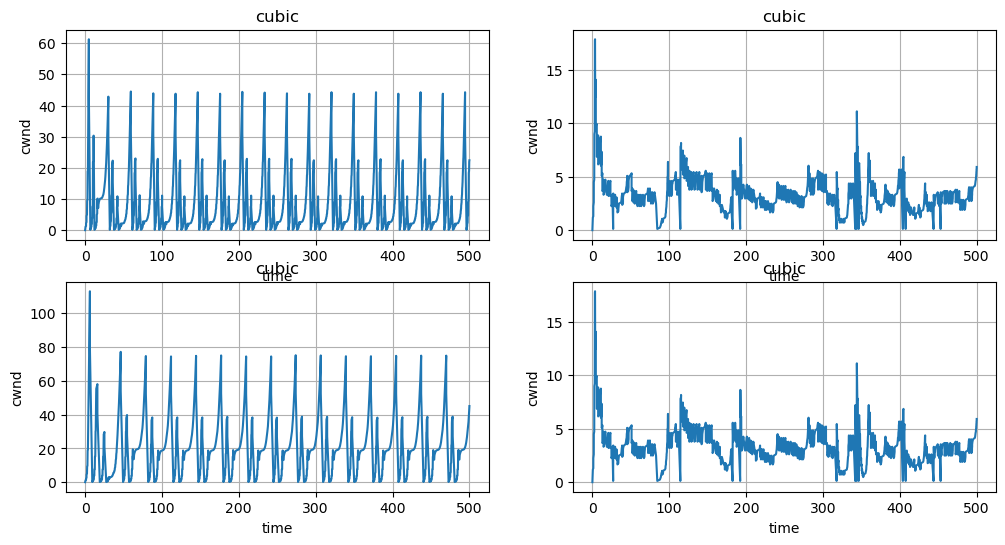

In [23]:
#configure before plotting
cca = "TcpCubic"

filename1 = f"04.08.23/cubic2/TcpCubic0.000001-300.000000ms-1Mbps-0-cwnd.data"
filename2 = f"04.08.23/cubic2/{cca}0.010000-300.000000ms-1Mbps-0-cwnd.data"
filename3 = f"04.08.23/cubic3/{cca}0.000001-300.000000ms-1Mbps-0-cwnd.data"
filename4 = f"04.08.23/cubic3/{cca}0.010000-300.000000ms-1Mbps-0-cwnd.data"
mtu = 400*8 # in bits
mss = (400-40) *8 # in bits
bandwidth = 1000000 # in bites per second
# read file and convert to numpy
print("theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", 1e6*0.6/mtu, "packets")
print("theoretical maximum cwnd for 500Kbps = 156packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", 5e5*0.6/mtu, "packets")
data = np.loadtxt(f'./ns3_results/{filename1}')
# plot data
fig, axs = plt.subplots(2, 2, figsize=(12,6))
axs[0,0].plot(data[:,0],data[:,1]/mss)
axs[0,0].set_xlabel("time")
axs[0,0].set_ylabel("cwnd")
axs[0,0].grid()
axs[0,0].set_title("cubic")
data = np.loadtxt(f'./ns3_results/{filename2}')
axs[0,1].plot(data[:,0],data[:,1]/mss)
axs[0,1].set_xlabel("time")
axs[0,1].set_ylabel("cwnd")
axs[0,1].grid()
axs[0,1].set_title("cubic")
data = np.loadtxt(f'./ns3_results/{filename3}')
axs[1,0].plot(data[:,0],data[:,1]/mss)
axs[1,0].set_xlabel("time")
axs[1,0].set_ylabel("cwnd")
axs[1,0].grid()
axs[1,0].set_title("cubic")
data = np.loadtxt(f'./ns3_results/{filename4}')
axs[1,1].plot(data[:,0],data[:,1]/mss)
axs[1,1].set_xlabel("time")
axs[1,1].set_ylabel("cwnd")
axs[1,1].grid()
axs[1,1].set_title("cubic")
plt.plot()

[]

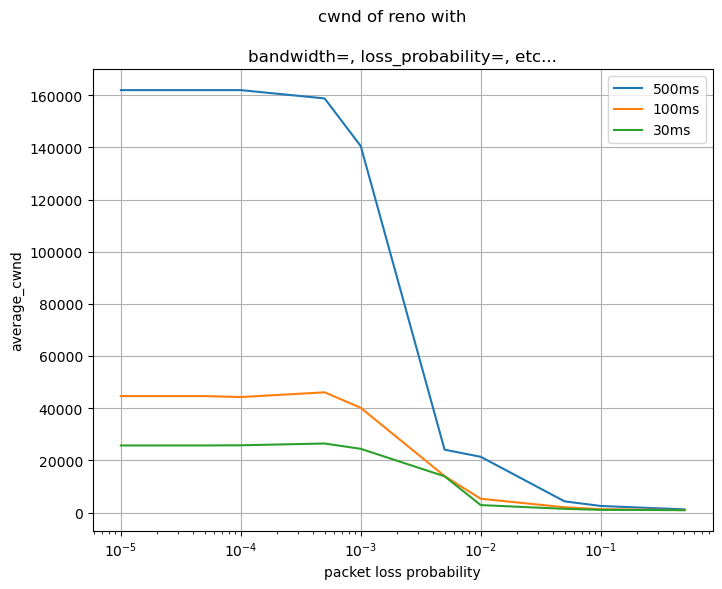

In [19]:
error_ps = ["0.500000","0.100000","0.050000","0.010000","0.005000","0.001000","0.000500","0.000100","0.000050","0.000010"]
error_ps_int = [0.500000,0.100000,0.050000,0.010000,0.005000,0.001000,0.000500,0.000100,0.000050,0.000010]
averages = np.zeros((len(error_ps),3))
# plot data
fig, axs = plt.subplots(1, 1, figsize=(8,6))
for i,e in enumerate(error_ps):
    e = e.replace('.','_')
    for j,rtt in enumerate([500,100,30]):
        filename = "TcpCubic"+e+"-"+str(rtt)+"ms-loss-cwnd.data"
        data = np.loadtxt(f'./ns3_results/{filename}')
        averages[i,j] = np.average(data[:,1])
axs.semilogx(error_ps_int,averages[:,0],label="500ms")
axs.semilogx(error_ps_int,averages[:,1],label="100ms")
axs.semilogx(error_ps_int,averages[:,2],label="30ms")
axs.set_xlabel("packet loss probability")
axs.set_ylabel("average_cwnd")
axs.grid()
axs.set_title("bandwidth=, loss_probability=, etc...")
axs.legend()
fig.suptitle("cwnd of reno with")
if save_figure:
    plt.savefig(f"./figures/ns3_results/{filename}.png")
plt.plot()

In [6]:
folder_path = "./ns3_results/cubic/"
# Get a list of all files in the folder
file_list = os.listdir(folder_path)
average_500_cubic = {}
average_100_cubic = {}
average_30_cubic = {}
# Loop through each file and save the average
for i,filename in enumerate(file_list):
    # Search for the pattern in the filename
    match = re.search(r"0_(\d+?)-", filename)
    if not match: 
        continue
    error = float("0."+ match.group(1))
    rtt = re.search(r"-(\d+)_",filename).group(1)
    data = np.loadtxt(f'./ns3_results/cubic/{filename}')
    if rtt == "500":
        average_500_cubic[error] = np.average(data[:,1])/1/1024
    if rtt == "100":
        average_100_cubic[error] = np.average(data[:,1])/0.2/1024
    if rtt == "30":
        average_30_cubic[error] = np.average(data[:,1])/0.06/1024
average_500_cubic=dict(sorted(average_500_cubic.items()))
average_100_cubic=dict(sorted(average_100_cubic.items()))
average_30_cubic=dict(sorted(average_30_cubic.items()))

In [7]:
folder_path = "./ns3_results/Hybla/"
# Get a list of all files in the folder
file_list = os.listdir(folder_path)
average_500 = {}
average_100 = {}
average_30 = {}
# Loop through each file and save the average
for i,filename in enumerate(file_list):
    # Search for the pattern in the filename
    match = re.search(r"0_(\d+?)-", filename)
    if not match: 
        continue
    error = float("0."+ match.group(1))
    rtt = re.search(r"-(\d+?)_",filename).group(1)
    data = np.loadtxt(f'./ns3_results/Hybla/{filename}')
    if rtt == "500":
        average_500[error] = np.average(data[:,1])/1/1024
    if rtt == "100":
        average_100[error] = np.average(data[:,1])/0.2/1024
    if rtt == "30":
        average_30[error] = np.average(data[:,1])/0.06/1024
average_500=dict(sorted(average_500.items()))
average_100=dict(sorted(average_100.items()))
average_30=dict(sorted(average_30.items()))

[]

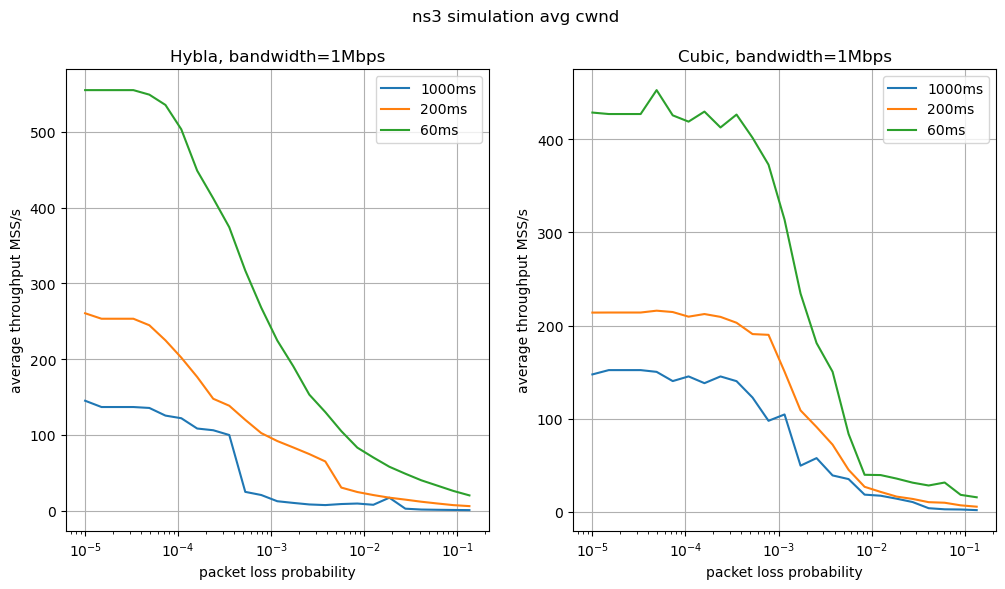

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[1].semilogx(average_500_cubic.keys(),average_500_cubic.values(),label="1000ms")
axs[1].semilogx(average_100_cubic.keys(),average_100_cubic.values(),label="200ms")
axs[1].semilogx(average_30_cubic.keys(),average_30_cubic.values(),label="60ms")
axs[1].set_xlabel("packet loss probability")
axs[1].set_ylabel("average throughput MSS/s")
axs[1].grid()
axs[1].set_title("Cubic, bandwidth=1Mbps")
axs[1].legend()
axs[0].semilogx(average_500.keys(),average_500.values(),label="1000ms")
axs[0].semilogx(average_100.keys(),average_100.values(),label="200ms")
axs[0].semilogx(average_30.keys(),average_30.values(),label="60ms")
axs[0].set_xlabel("packet loss probability")
axs[0].set_ylabel("average throughput MSS/s")
axs[0].grid()
axs[0].set_title("Hybla, bandwidth=1Mbps")
axs[0].legend()
fig.suptitle("ns3 simulation avg cwnd")
save_figure=True
if save_figure:
    plt.savefig(f"./figures/ns3_results/HyblaCubicthroughput.png")
plt.plot()

In [36]:
folder_path = "./ns3_results/19.07.23/cubic/"
# Get a list of all files in the folder
file_list = os.listdir(folder_path)
average_500_cubic = {}
average_100_cubic = {}
average_30_cubic = {}
# Loop through each file and save the average
for i,filename in enumerate(file_list):
    # Search for the pattern in the filename
    match = re.search(r"0\.(\d+?)-", filename)
    if not match: 
        continue
    error = float("0."+ match.group(1))
    rtt = re.search(r"-(\d+?)\.",filename).group(1)
    data = np.loadtxt(folder_path+filename)
    if rtt == "250":
        average_500_cubic[error] = np.average(data[:,1])/1/1024
    if rtt == "50":
        average_100_cubic[error] = np.average(data[:,1])/0.2/1024
    if rtt == "15":
        average_30_cubic[error] = np.average(data[:,1])/0.06/1024
average_500_cubic=dict(sorted(average_500_cubic.items()))
average_100_cubic=dict(sorted(average_100_cubic.items()))
average_30_cubic=dict(sorted(average_30_cubic.items()))

In [40]:
folder_path = "./ns3_results/19.07.23/hybla/"
# Get a list of all files in the folder
file_list = os.listdir(folder_path)
average_500 = {}
average_100 = {}
average_30 = {}
# Loop through each file and save the average
for i,filename in enumerate(file_list):
    # Search for the pattern in the filename
    match = re.search(r"0\.(\d+?)-", filename)
    if not match: 
        continue
    error = float("0."+ match.group(1))
    rtt = re.search(r"-(\d+?)\.",filename).group(1)
    data = np.loadtxt(f'./ns3_results/19.07.23/hybla/{filename}')
    if rtt == "250":
        average_500[error] = np.average(data[:,1])/0.5
    if rtt == "50":
        average_100[error] = np.average(data[:,1])/0.1
    if rtt == "15":
        average_30[error] = np.average(data[:,1])/0.03
average_500=dict(sorted(average_500.items()))
average_100=dict(sorted(average_100.items()))
average_30=dict(sorted(average_30.items()))

[]

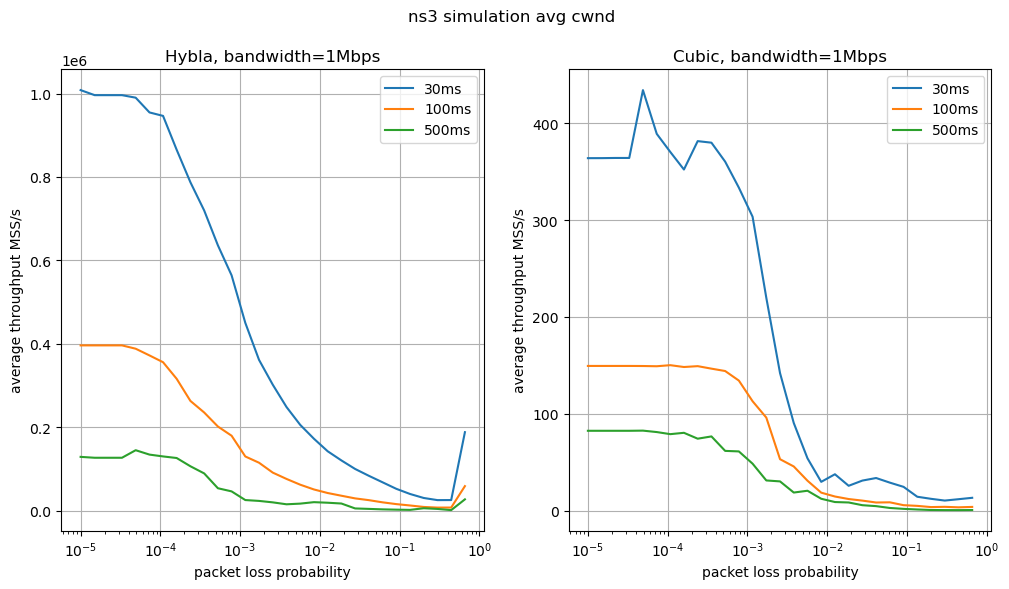

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[1].semilogx(average_30_cubic.keys(),average_30_cubic.values(),label="30ms",color="tab:blue")
axs[1].semilogx(average_100_cubic.keys(),average_100_cubic.values(),label="100ms",color="tab:orange")
axs[1].semilogx(average_500_cubic.keys(),average_500_cubic.values(),label="500ms",color="tab:green")
axs[1].set_xlabel("packet loss probability")
axs[1].set_ylabel("average throughput MSS/s")
axs[1].grid()
axs[1].set_title("Cubic, bandwidth=1Mbps")
axs[1].legend()
axs[0].semilogx(average_30.keys(),average_30.values(),label="30ms", color="tab:blue")
axs[0].semilogx(average_100.keys(),average_100.values(),label="100ms", color="tab:orange")
axs[0].semilogx(average_500.keys(),average_500.values(),label="500ms",color="tab:green")
axs[0].set_xlabel("packet loss probability")
axs[0].set_ylabel("average cwnd")
axs[0].grid()
axs[0].set_title("Hybla, bandwidth=1Mbps, rtt0=25ms")
axs[0].legend()
fig.suptitle("ns3 simulation avg cwnd")
save_figure=False
if save_figure:
    plt.savefig(f"./figures/ns3_results/HyblaCubicCwnd.png")
plt.plot()

theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  187.5 packets


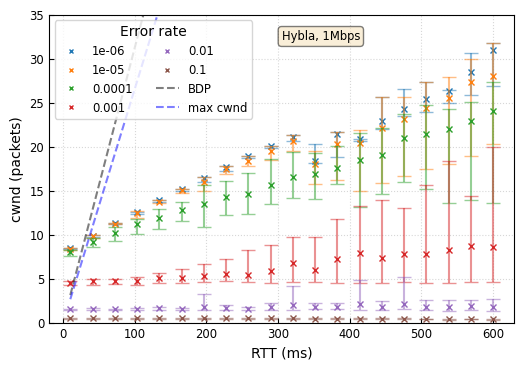

In [79]:
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 400*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "1Mbps"
bdw = 1e6
cca = "Hybla"
folder_path = "./ns3_results/03.08.23/hybla2/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(f'{folder_path}{filename}')
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    results[bandwidth][error][rtt].append(average_cwnd(f'{folder_path}{filename}'))


fig, ax = plt.subplots(1,1,figsize=(6,4))
print("theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", 1e6*0.6/mtu, "packets")

# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        points[i,:] = rtt , np.average(results[bw][error][rtt])/mtu, np.min(results[bw][error][rtt])/mtu, np.max(results[bw][error][rtt])/mtu
    points = points[points[:,0].argsort()]
    ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1],label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
ax.plot(points[:,0],bdw*points[:,0]/1000/mtu,linestyle='--',color='black', alpha = 0.5,label="BDP")
ax.plot(points[:,0],1.7/2*bdw*points[:,0]/1000/mtu,linestyle='--',color='blue', alpha = 0.5,label="max cwnd")
ax.set_ylim(0, 35)
ax.text(0.50, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("cwnd (packets)")
plt.show()    
# add the figure legend in latex as Average cwnd for different RTTs and errors, Hybla, Bottleneck bandwidth = 1Mbps

theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  187.5 packets


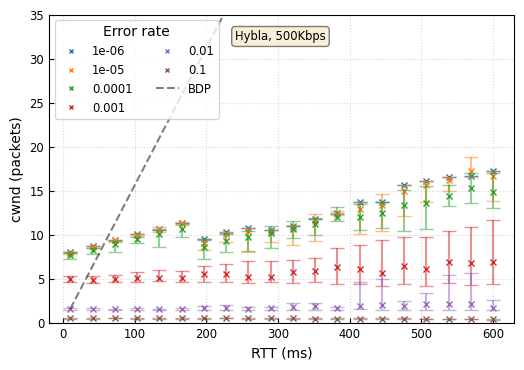

In [73]:
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 400*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "500Kbps"
bdw = 500000

folder_path = "./ns3_results/03.08.23/hybla2/"
# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(f'{folder_path}{filename}')
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    results[bandwidth][error][rtt].append(average_cwnd(f'{folder_path}{filename}'))


fig, ax = plt.subplots(1,1,figsize=(6,4))
print("theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", 1e6*0.6/mtu, "packets")

# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        points[i,:] = rtt , np.average(results[bw][error][rtt])/mtu, np.min(results[bw][error][rtt])/mtu, np.max(results[bw][error][rtt])/mtu
    points = points[points[:,0].argsort()]
    ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1],label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
ax.plot(points[:,0],bdw*points[:,0]/1000/mtu,linestyle='--',color='black', alpha = 0.5,label="BDP")
ax.set_ylim(0, 35)
ax.text(0.40, 0.95, f"Hybla, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("cwnd (packets)")
plt.show()    
# add the figure legend in latex as Average cwnd for different RTTs and errors, Hybla, Bottleneck bandwidth = 1Mbps

theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  187.5 packets


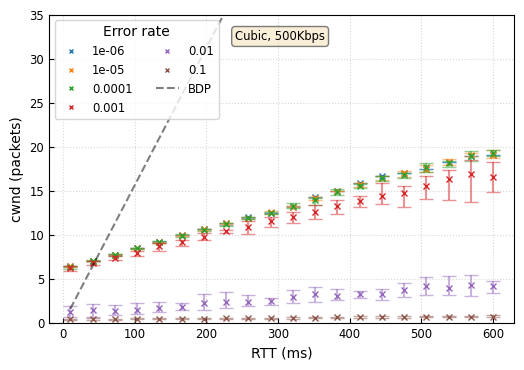

In [75]:
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 400*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "500Kbps"
bdw = 500000
cca = "Cubic"
folder_path = "./ns3_results/03.08.23/cubic2/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(f'{folder_path}{filename}')
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    results[bandwidth][error][rtt].append(average_cwnd(f'{folder_path}{filename}'))


fig, ax = plt.subplots(1,1,figsize=(6,4))
print("theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", 1e6*0.6/mtu, "packets")

# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        points[i,:] = rtt , np.average(results[bw][error][rtt])/mtu, np.min(results[bw][error][rtt])/mtu, np.max(results[bw][error][rtt])/mtu
    points = points[points[:,0].argsort()]
    ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1],label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
ax.plot(points[:,0],bdw*points[:,0]/1000/mtu,linestyle='--',color='black', alpha = 0.5,label="BDP")
ax.set_ylim(0, 35)
ax.text(0.40, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("cwnd (packets)")
plt.show()    
# add the figure legend in latex as Average cwnd for different RTTs and errors, Hybla, Bottleneck bandwidth = 1Mbps

theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  187.5 packets


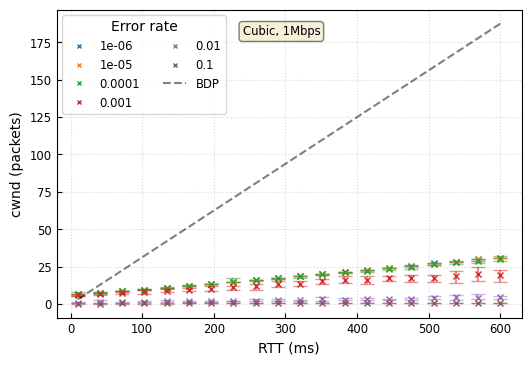

In [80]:
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 400*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "1Mbps"
bdw = 1e6
cca = "Cubic"
folder_path = "./ns3_results/03.08.23/cubic2/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(f'{folder_path}{filename}')
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    results[bandwidth][error][rtt].append(average_cwnd(f'{folder_path}{filename}'))


fig, ax = plt.subplots(1,1,figsize=(6,4))
print("theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", 1e6*0.6/mtu, "packets")

# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        points[i,:] = rtt , np.average(results[bw][error][rtt])/mtu, np.min(results[bw][error][rtt])/mtu, np.max(results[bw][error][rtt])/mtu
    points = points[points[:,0].argsort()]
    ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1],label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
#ax.plot(points[:,0],bdw*points[:,0]/1000/mtu,linestyle='--',color='black', alpha = 0.5,label="BDP")
#ax.set_ylim(0, 35)
ax.text(0.40, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("cwnd (packets)")
plt.show()    
# add the figure legend in latex as Average cwnd for different RTTs and errors, Hybla, Bottleneck bandwidth = 1Mbps

theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  187.5 packets


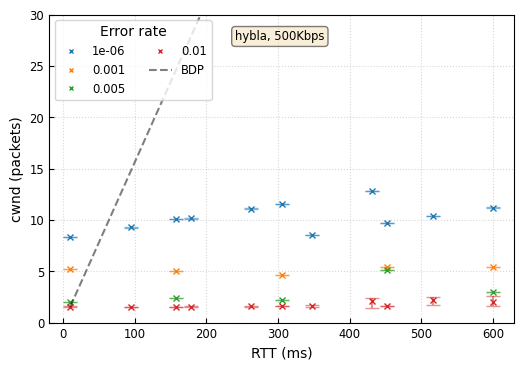

In [85]:
# This is a new test where I deleted all the queues on the network
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 400*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "500Kbps"
bdw = 5e5
cca = "hybla"
folder_path = "./ns3_results/04.08.23/hybla/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(f'{folder_path}{filename}')
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    results[bandwidth][error][rtt].append(average_cwnd(f'{folder_path}{filename}'))


fig, ax = plt.subplots(1,1,figsize=(6,4))
print("theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", 1e6*0.6/mtu, "packets")

# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        points[i,:] = rtt , np.average(results[bw][error][rtt])/mtu, np.min(results[bw][error][rtt])/mtu, np.max(results[bw][error][rtt])/mtu
    points = points[points[:,0].argsort()]
    ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1],label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
ax.plot(points[:,0],bdw*points[:,0]/1000/mtu,linestyle='--',color='black', alpha = 0.5,label="BDP")
ax.set_ylim(0, 30)
ax.text(0.40, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("cwnd (packets)")
plt.show()

In [12]:
def average_cwnd(file_path):
    try:
        data = np.loadtxt(file_path)
        # only take values after time is more than 100
        return np.average(data[data[:,0] > 100])
    except: 
        return 0

def get_error(file_path):
    match = re.search(r"_(\d[.\d]*?e-\d+?)_", file_path)
    if not match: 
        print(f"Error: Error not found in {file_path}")
        return None
    return float(match.group(1))

def get_rtt_max(folder_path,file_path):
    data = np.loadtxt(f"{folder_path}{str.replace(file_path,'cwnd','rtt')}")
    rtt = np.median(data[:,1])
    return rtt.round(2)

def get_rtt(folder_path,file_path):
    match = re.search(r"_(\d+?\.\d+?)ms_",file_path)
    if not match: 
        print(f"Error: Delay not found in {file_path}")
        return None
    return match.group(1)

def get_run(file_path):
    match = re.search(r"_(\d+?)-",file_path)
    if not match: 
        print(f"Error: Run not found in {file_path}")
        return None
    return int(match.group(1))
def get_bandwidth(file_path):
    match = re.search(r"_(\d+?[GMK]bps)_",file_path)
    if not match: 
        print(f"Error: Bandwidth not found in {file_path}")
        return None
    return match.group(1)

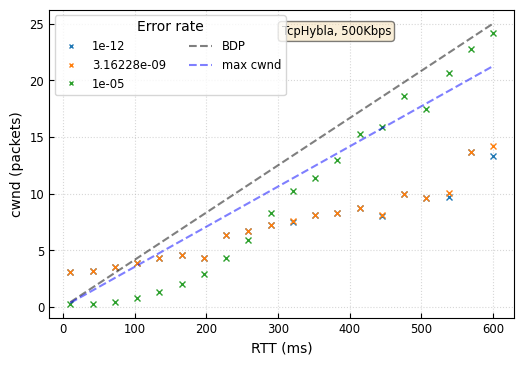

In [6]:
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 1500*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "500Kbps"
bdw = 5e5
cca = "TcpHybla"
folder_path = f"../../../Documents/Github/ns-3-dev/results/tcp_model_comparison/{cca}/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    if filename[-5:] != ".data":
        continue
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(folder_path,filename)
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    results[bandwidth][error][rtt].append(average_cwnd(f'{folder_path}{filename}'))
# keep only results with an average cwnd greater than 0
for bw in results:
    for error in results[bw]:
        for rtt in results[bw][error]:
            results[bw][error][rtt] = [x for x in results[bw][error][rtt] if x > 0]

fig, ax = plt.subplots(1,1,figsize=(6,4))

# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        points[i,:] = float(rtt)*2 , np.max(results[bw][error][rtt])/mtu, np.min(results[bw][error][rtt])/mtu, np.max(results[bw][error][rtt])/mtu
    points = points[points[:,0].argsort()]
    #ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1],label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
ax.plot(points[:,0],bdw*points[:,0]/mtu/1000,linestyle='--',color='black', alpha = 0.5,label="BDP")
ax.plot(points[:,0],1.7/2*bdw*points[:,0]/mtu/1000,linestyle='--',color='blue', alpha = 0.5,label="max cwnd")
#ax.set_ylim(0, 35)
ax.text(0.50, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("cwnd (packets)")
plt.show()    
# add the figure legend in latex as Average cwnd for different RTTs and errors, Hybla, Bottleneck bandwidth = 1Mbps

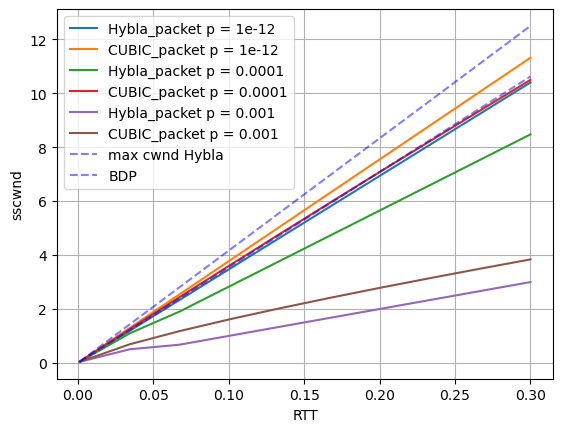

In [3]:
from ccaModels import CCA_MarkovChain_Hybla_bit, CCA_MarkovChain_CUBIC_bit
# For a bandwidth of 500Kbits, a packet size of 1500 bytes, the bandwidth in packets is 500000/(1500*8) = 41.67 packets per second 
rtts = np.linspace(0.001,0.3,10)
packet_error = np.array([1e-12,1e-4,1e-3])
throughputs = np.zeros((2*len(packet_error),len(rtts)))
for k, err in enumerate(packet_error):
    for i, rtt in enumerate(rtts):
        wireless = CCA_MarkovChain_Hybla_bit(packet_err=err,beta=0.7,N=100,C = 41,RTT_real=rtt, RTT0=0.05)
        cubic = CCA_MarkovChain_CUBIC_bit(packet_err=err*100,beta=0.7,N=100,C = 41,RTT_real=rtt)
        throughputs[2*k,i] = wireless.sscwnd()
        throughputs[2*k+1,i] = cubic.sscwnd()
for k,err in enumerate(packet_error):
    plt.plot(rtts,throughputs[2*k,:], label = "Hybla_packet p = {}".format(err))
    plt.plot(rtts,throughputs[2*k+1,:], label = "CUBIC_packet p = {}".format(err))
plt.plot(rtts,1.7/2*41.67*rtts,linestyle='--',color='blue', alpha = 0.5,label="max cwnd Hybla")
plt.plot(rtts,41.67*rtts,linestyle='--',color='blue', alpha = 0.5,label="BDP")
plt.legend()
plt.grid()
plt.xlabel(r"RTT")
plt.ylabel(r'sscwnd')
plt.show()

/Users/jeanmegret/opt/anaconda3/envs/qpepcca/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/jeanmegret/opt/anaconda3/envs/qpepcca/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


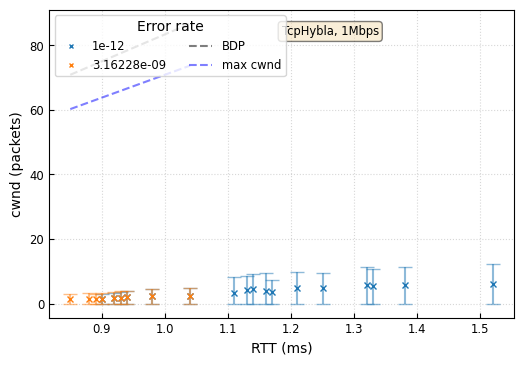

In [92]:
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 1500*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "1Mbps"
bdw = 1e6
cca = "TcpHybla"
folder_path = f"../../../Documents/Github/ns-3-dev/results/tcp_model_comparison/{cca}/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    if filename[-5:] != ".data":
        continue
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt_max(folder_path,filename)
    if rtt > 10:
        continue
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    results[bandwidth][error][rtt].append(average_cwnd(f'{folder_path}{filename}'))


fig, ax = plt.subplots(1,1,figsize=(6,4))

# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        points[i,:] = rtt , np.average(results[bw][error][rtt])/mtu, np.min(results[bw][error][rtt])/mtu, np.max(results[bw][error][rtt])/mtu
    points = points[points[:,0].argsort()]
    ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1],label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
ax.plot(points[:,0],bdw*points[:,0]/mtu,linestyle='--',color='black', alpha = 0.5,label="BDP")
ax.plot(points[:,0],1.7/2*bdw*points[:,0]/mtu,linestyle='--',color='blue', alpha = 0.5,label="max cwnd")
#ax.set_ylim(0, 35)
ax.text(0.50, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("cwnd (packets)")
plt.show()
# add the figure legend in latex as Average cwnd for different RTTs and errors, Hybla, Bottleneck bandwidth = 1Mbps

### Doing the experiments again, for single link instead of two

error 0.0001, rtt 293.750000 has following results []
error 0.0001, rtt 149.375000 has following results []
error 0.0001, rtt 66.875000 has following results []
error 0.0001, rtt 417.500000 has following results []
error 0.0001, rtt 5.000000 has following results []
error 0.0001, rtt 252.500000 has following results []
error 0.0001, rtt 190.625000 has following results []
error 0.01, rtt 293.750000 has following results []
error 0.01, rtt 108.125000 has following results []
error 0.01, rtt 479.375000 has following results []
error 0.01, rtt 314.375000 has following results []
error 0.01, rtt 25.625000 has following results []
error 0.01, rtt 170.000000 has following results []
error 0.01, rtt 458.750000 has following results []
error 0.01, rtt 5.000000 has following results []
error 0.01, rtt 500.000000 has following results []
error 0.01, rtt 355.625000 has following results []
error 0.01, rtt 231.875000 has following results []
error 0.01, rtt 46.250000 has following results []
error

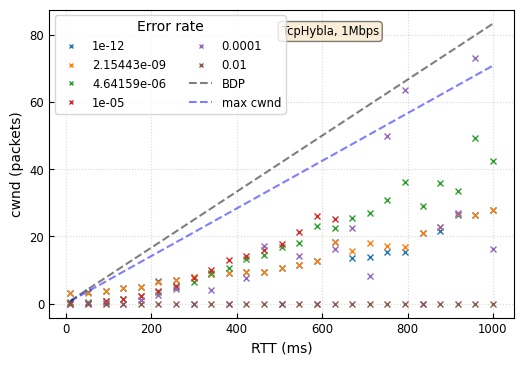

In [27]:
def average_cwnd(file_path):
    try:
        data = np.loadtxt(file_path)
        # only take values after time is more than 100 seconds
        return np.average(data[data[:,0] > 100])
    except: 
        return 0

def get_error(file_path):
    match = re.search(r"_(\d[.\d]*?e-\d+?|\d+?.\d+?)_", file_path)
    if not match: 
        print(f"Error: Error not found in {file_path}")
        return None
    return float(match.group(1))

def get_rtt_max(folder_path,file_path):
    data = np.loadtxt(f"{folder_path}{str.replace(file_path,'cwnd','rtt')}")
    rtt = np.median(data[:,1])
    return rtt.round(2)

def get_rtt(folder_path,file_path):
    match = re.search(r"_(\d+?\.\d+?)ms_",file_path)
    if not match: 
        print(f"Error: Delay not found in {file_path}")
        return None
    return match.group(1)

def get_run(file_path):
    match = re.search(r"_(\d+?)-",file_path)
    if not match: 
        print(f"Error: Run not found in {file_path}")
        return None
    return int(match.group(1))
def get_bandwidth(file_path):
    match = re.search(r"_(\d+?[GMK]bps)_",file_path)
    if not match: 
        print(f"Error: Bandwidth not found in {file_path}")
        return None
    return match.group(1)
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 1500*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bdw = 1e6
cca = "TcpHybla"
folder_path = f"../../../Documents/Github/ns-3-dev/results/tcp_model_comparison_final/{cca}/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    if filename[-9:] != "cwnd.data":
        continue
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(folder_path,filename)
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    results[bandwidth][error][rtt].append(average_cwnd(f'{folder_path}{filename}'))
# keep only results with an average cwnd greater than 0
for bw in results:
    for error in results[bw]:
        for rtt in results[bw][error]:
            results[bw][error][rtt] = [x for x in results[bw][error][rtt] if x > 1000]

fig, ax = plt.subplots(1,1,figsize=(6,4))

# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        try:
            points[i,:] = float(rtt)*2 , np.max(results[bw][error][rtt])/mtu, np.min(results[bw][error][rtt])/mtu, np.max(results[bw][error][rtt])/mtu
        except:
            print(f"error {error}, rtt {rtt} has following results {results[bw][error][rtt]}")
            points[i,:] = float(rtt)*2 , 0, 0, 0
    points = points[points[:,0].argsort()]
    #ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1],label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
ax.plot(points[:,0],bdw*points[:,0]/mtu/1000,linestyle='--',color='black', alpha = 0.5,label="BDP")
ax.plot(points[:,0],1.7/2*bdw*points[:,0]/mtu/1000,linestyle='--',color='blue', alpha = 0.5,label="max cwnd")
#ax.set_ylim(0, 35)
ax.text(0.50, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("cwnd (packets)")
plt.show()    
# add the figure legend in latex as Average cwnd for different RTTs and errors, Hybla, Bottleneck bandwidth = 1Mbps

error 0.0001, rtt 5.000000 has following results []
error 0.01, rtt 252.500000 has following results []
error 0.01, rtt 66.875000 has following results []
error 0.01, rtt 479.375000 has following results []
error 0.01, rtt 417.500000 has following results []
error 0.01, rtt 25.625000 has following results []
error 0.01, rtt 314.375000 has following results []
error 0.01, rtt 149.375000 has following results []
error 0.01, rtt 231.875000 has following results []
error 0.01, rtt 128.750000 has following results []
error 0.01, rtt 335.000000 has following results []
error 0.01, rtt 87.500000 has following results []
error 0.01, rtt 458.750000 has following results []
error 0.01, rtt 170.000000 has following results []
error 0.01, rtt 5.000000 has following results []
error 0.01, rtt 500.000000 has following results []
error 0.01, rtt 376.250000 has following results []
error 0.01, rtt 355.625000 has following results []
error 0.01, rtt 438.125000 has following results []
error 0.01, rtt 2

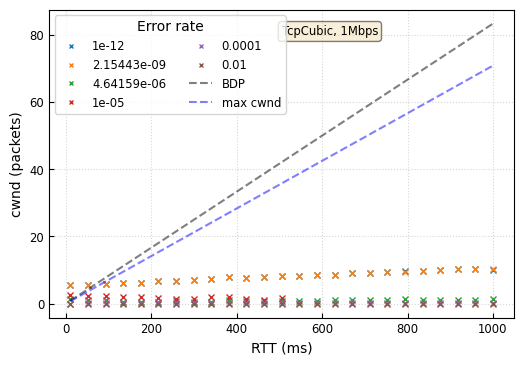

In [19]:
def average_cwnd(file_path):
    try:
        data = np.loadtxt(file_path)
        # only take values after time is more than 100 seconds
        return np.average(data[data[:,0] > 100])
    except: 
        return 0

def get_error(file_path):
    match = re.search(r"_(\d[.\d]*?e-\d+?|\d+?.\d+?)_", file_path)
    if not match: 
        print(f"Error: Error not found in {file_path}")
        return None
    return float(match.group(1))

def get_rtt_max(folder_path,file_path):
    data = np.loadtxt(f"{folder_path}{str.replace(file_path,'cwnd','rtt')}")
    rtt = np.median(data[:,1])
    return rtt.round(2)

def get_rtt(folder_path,file_path):
    match = re.search(r"_(\d+?\.\d+?)ms_",file_path)
    if not match: 
        print(f"Error: Delay not found in {file_path}")
        return None
    return match.group(1)

def get_run(file_path):
    match = re.search(r"_(\d+?)-",file_path)
    if not match: 
        print(f"Error: Run not found in {file_path}")
        return None
    return int(match.group(1))
def get_bandwidth(file_path):
    match = re.search(r"_(\d+?[GMK]bps)_",file_path)
    if not match: 
        print(f"Error: Bandwidth not found in {file_path}")
        return None
    return match.group(1)
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 1500*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "1Mbps"
bdw = 1e6
cca = "TcpCubic"
folder_path = f"../../../Documents/Github/ns-3-dev/results/tcp_model_comparison_final/{cca}/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    if filename[-5:] != ".data":
        continue
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(folder_path,filename)
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    results[bandwidth][error][rtt].append(average_cwnd(f'{folder_path}{filename}'))
# keep only results with an average cwnd greater than 0
for bw in results:
    for error in results[bw]:
        for rtt in results[bw][error]:
            results[bw][error][rtt] = [x for x in results[bw][error][rtt] if x > 0]

fig, ax = plt.subplots(1,1,figsize=(6,4))

# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        try:
            points[i,:] = float(rtt)*2 , np.max(results[bw][error][rtt])/mtu, np.min(results[bw][error][rtt])/mtu, np.max(results[bw][error][rtt])/mtu
        except:
            print(f"error {error}, rtt {rtt} has following results {results[bw][error][rtt]}")
            points[i,:] = float(rtt)*2 , 0, 0, 0
    points = points[points[:,0].argsort()]
    #ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1],label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
ax.plot(points[:,0],bdw*points[:,0]/mtu/1000,linestyle='--',color='black', alpha = 0.5,label="BDP")
ax.plot(points[:,0],1.7/2*bdw*points[:,0]/mtu/1000,linestyle='--',color='blue', alpha = 0.5,label="max cwnd")
#ax.set_ylim(0, 35)
ax.text(0.50, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("cwnd (packets)")
plt.show()    
# add the figure legend in latex as Average cwnd for different RTTs and errors, Hybla, Bottleneck bandwidth = 1Mbps

error 0.0001, rtt 25.625000 has following results []
error 0.01, rtt 149.375000 has following results []
error 0.01, rtt 417.500000 has following results []
error 0.01, rtt 335.000000 has following results []
error 0.01, rtt 231.875000 has following results []
error 0.01, rtt 396.875000 has following results []
error 0.01, rtt 252.500000 has following results []
error 0.01, rtt 438.125000 has following results []
error 0.01, rtt 211.250000 has following results []
error 0.01, rtt 5.000000 has following results []
error 0.01, rtt 376.250000 has following results []
error 0.01, rtt 25.625000 has following results []
error 0.01, rtt 479.375000 has following results []
error 0.01, rtt 87.500000 has following results []
error 0.01, rtt 128.750000 has following results []
error 0.01, rtt 273.125000 has following results []
error 0.01, rtt 46.250000 has following results []
error 0.01, rtt 170.000000 has following results []
error 0.01, rtt 66.875000 has following results []
error 0.01, rtt 3

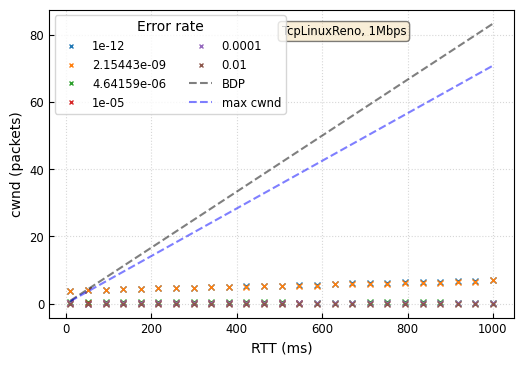

In [20]:
def average_cwnd(file_path):
    try:
        data = np.loadtxt(file_path)
        # only take values after time is more than 100 seconds
        return np.average(data[data[:,0] > 100])
    except: 
        return 0

def get_error(file_path):
    match = re.search(r"_(\d[.\d]*?e-\d+?|\d+?.\d+?)_", file_path)
    if not match: 
        print(f"Error: Error not found in {file_path}")
        return None
    return float(match.group(1))

def get_rtt_max(folder_path,file_path):
    data = np.loadtxt(f"{folder_path}{str.replace(file_path,'cwnd','rtt')}")
    rtt = np.median(data[:,1])
    return rtt.round(2)

def get_rtt(folder_path,file_path):
    match = re.search(r"_(\d+?\.\d+?)ms_",file_path)
    if not match: 
        print(f"Error: Delay not found in {file_path}")
        return None
    return match.group(1)

def get_run(file_path):
    match = re.search(r"_(\d+?)-",file_path)
    if not match: 
        print(f"Error: Run not found in {file_path}")
        return None
    return int(match.group(1))
def get_bandwidth(file_path):
    match = re.search(r"_(\d+?[GMK]bps)_",file_path)
    if not match: 
        print(f"Error: Bandwidth not found in {file_path}")
        return None
    return match.group(1)
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 1500*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "1Mbps"
bdw = 1e6
cca = "TcpLinuxReno"
folder_path = f"../../../Documents/Github/ns-3-dev/results/tcp_model_comparison_final/{cca}/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    if filename[-5:] != ".data":
        continue
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(folder_path,filename)
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    results[bandwidth][error][rtt].append(average_cwnd(f'{folder_path}{filename}'))
# keep only results with an average cwnd greater than 0
for bw in results:
    for error in results[bw]:
        for rtt in results[bw][error]:
            results[bw][error][rtt] = [x for x in results[bw][error][rtt] if x > 0]

fig, ax = plt.subplots(1,1,figsize=(6,4))

# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        try:
            points[i,:] = float(rtt)*2 , np.max(results[bw][error][rtt])/mtu, np.min(results[bw][error][rtt])/mtu, np.max(results[bw][error][rtt])/mtu
        except:
            print(f"error {error}, rtt {rtt} has following results {results[bw][error][rtt]}")
            points[i,:] = float(rtt)*2 , 0, 0, 0
    points = points[points[:,0].argsort()]
    #ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1],label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
ax.plot(points[:,0],bdw*points[:,0]/mtu/1000,linestyle='--',color='black', alpha = 0.5,label="BDP")
ax.plot(points[:,0],1.7/2*bdw*points[:,0]/mtu/1000,linestyle='--',color='blue', alpha = 0.5,label="max cwnd")
#ax.set_ylim(0, 35)
ax.text(0.50, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("cwnd (packets)")
plt.show()    
# add the figure legend in latex as Average cwnd for different RTTs and errors, Hybla, Bottleneck bandwidth = 1Mbps

Now plotting the perceived rtt

dict_keys([0.01, 4.64159e-06, 2.15443e-09, 0.0001, 1e-12, 1e-05])


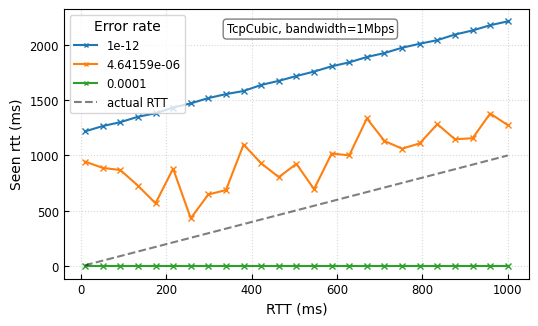

In [65]:
plt.rcParams['text.usetex'] = True

def average_cwnd(file_path):
    try:
        data = np.loadtxt(file_path)
        # only take values after time is more than 100 seconds
        return np.average(data[data[:,0] > 100])
    except: 
        return 0

def get_error(file_path):
    match = re.search(r"_(\d[.\d]*?e-\d+?|\d+?.\d+?)_", file_path)
    if not match: 
        print(f"Error: Error not found in {file_path}")
        return None
    return float(match.group(1))

def get_rtt_max(folder_path,file_path):
    data = np.loadtxt(f"{folder_path}{str.replace(file_path,'cwnd','rtt')}")
    rtt = np.median(data[:,1])
    return rtt.round(2)

def get_rtt(folder_path,file_path):
    match = re.search(r"_(\d+?\.\d+?)ms_",file_path)
    if not match: 
        print(f"Error: Delay not found in {file_path}")
        return None
    return match.group(1)

def get_run(file_path):
    match = re.search(r"_(\d+?)-",file_path)
    if not match: 
        print(f"Error: Run not found in {file_path}")
        return None
    return int(match.group(1))
def get_bandwidth(file_path):
    match = re.search(r"_(\d+?[GMK]bps)_",file_path)
    if not match: 
        print(f"Error: Bandwidth not found in {file_path}")
        return None
    return match.group(1)
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 1500*8 # bits
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
bw = "1Mbps"
bdw = 1e6
cca = "TcpCubic"
folder_path = f"../../../Documents/Github/ns-3-dev/results/tcp_model_comparison_final/{cca}/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    if filename[-8:] != "rtt.data":
        continue
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(folder_path,filename)
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    try:
        data = np.loadtxt(f'{folder_path}{filename}')
        # only take values after time is more than 100 seconds
        results[bandwidth][error][rtt].append(np.max(data[:,1]))
    except:
        results[bandwidth][error][rtt].append(0)
fig, ax = plt.subplots(1,1,figsize=(6,3.5))

# sort the dictionary by error key
print(results[bw].keys())
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate([1e-12,4.64159e-06,0.0001]):#enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        # try:
        #     points[i,:] = float(rtt)*2 , np.max(results[bw][error][rtt]), np.min(results[bw][error][rtt]), np.max(results[bw][error][rtt])
        # except:
        #     print(f"error {error}, rtt {rtt} has following results {results[bw][error][rtt]}")
        #     points[i,:] = float(rtt)*2 , 0, 0, 0
        points[i,:] = float(rtt)*2 , np.max(results[bw][error][rtt]), np.min(results[bw][error][rtt]), np.max(results[bw][error][rtt])
    points = points[points[:,0].argsort()]
    #ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1]*1000,label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='-',color=my_colours[j%len(my_colours)])
#ax.set_ylim(0, 35)
ax.plot(points[:,0],points[:,0],linestyle='--',color='black', alpha = 0.5)
ax.text(0.35, 0.95, f"{cca}, bandwidth={bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Bit error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=1)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("Seen rtt (ms)")
#plt.savefig("./figures/ns3_results/cubic_seen_rtt.png", bbox_inches='tight', dpi=400)
plt.show()    
# add the figure legend in latex as Average cwnd for different RTTs and errors, Hybla, Bottleneck bandwidth = 1Mbps

Now we plot the received data

In [100]:
plt.rcParams.update(plt.rcParamsDefault)
def average_cwnd(file_path):
    try:
        data = np.loadtxt(file_path)
        # only take values after time is more than 100 seconds
        return np.average(data[data[:,0] > 100])
    except: 
        return 0

def get_error(file_path):
    match = re.search(r"_(\d[.\d]*?e-\d+?|\d+?.\d+?)_", file_path)
    if not match: 
        print(f"Error: Error not found in {file_path}")
        return None
    return float(match.group(1))

def get_rtt_max(folder_path,file_path):
    data = np.loadtxt(f"{folder_path}{str.replace(file_path,'cwnd','rtt')}")
    rtt = np.median(data[:,1])
    return rtt.round(2)

def get_rtt(folder_path,file_path):
    match = re.search(r"_(\d+?\.\d+?)ms_",file_path)
    if not match: 
        print(f"Error: Delay not found in {file_path}")
        return None
    return match.group(1)

def get_run(file_path):
    match = re.search(r"_(\d+?)-",file_path)
    if not match: 
        print(f"Error: Run not found in {file_path}")
        return None
    return int(match.group(1))
def get_bandwidth(file_path):
    match = re.search(r"_(\d+?[GMK]bps)_",file_path)
    if not match: 
        print(f"Error: Bandwidth not found in {file_path}")
        return None
    return match.group(1)
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 1500*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "1Mbps"
bdw = 1e6
cca = "TcpCubic"
folder_path = f"../../../Documents/Github/ns-3-dev/results/tcp_model_comparison_final/{cca}/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    if filename[-13:] != "received.data":
        continue
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(folder_path,filename)
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    try:
        data = np.loadtxt(f'{folder_path}{filename}')
        results[bandwidth][error][rtt].append(np.sum(data[:,1]))
    except:
        continue

# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
bit_error = [1e-12, 1e-07, 4.64159e-06, 1e-05, 0.0001]
rtts = np.linspace(0.001,1,20)
throughputs = np.zeros((len(bit_error),len(rtts)))
points = np.zeros((len(bit_error),len(results[bw][error]),4))
for j,error in enumerate(bit_error):
    for i, rtt in enumerate(results[bw][error]):
        # try:
        #     points[i,:] = float(rtt)*2 , np.max(results[bw][error][rtt]), np.min(results[bw][error][rtt]), np.max(results[bw][error][rtt])
        # except:
        #     print(f"error {error}, rtt {rtt} has following results {results[bw][error][rtt]}")
        #     points[i,:] = float(rtt)*2 , 0, 0, 0
        points[j,i,:] = float(rtt)*2/1000 , np.max(results[bw][error][rtt])/1000, np.min(results[bw][error][rtt]), np.max(results[bw][error][rtt])
    for i, rtt in enumerate(rtts):
        cubic = CCA_MarkovChain_CUBIC_bit(packet_err=error*(1500*8),beta=0.7,N=100,C = 41,RTT_real=rtt)
        throughputs[j,i] = cubic.avg_throughput()
    #points[j,:,:] = points[points[:,0].argsort()]
    #ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])

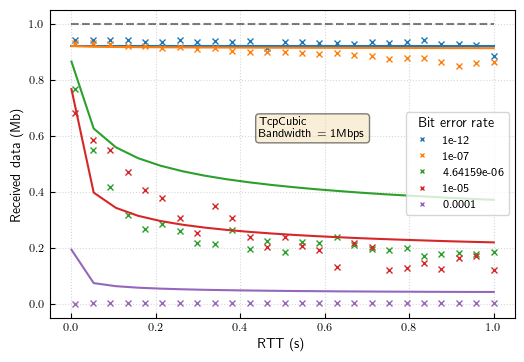

In [112]:
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots(1,1,figsize=(6,4))
for j,error in enumerate(packet_error):
    ax.plot(points[j,:,0],points[j,:,1]*8/1e6,label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
    ax.plot(rtts,throughputs[j,:],color=my_colours[j%len(my_colours)])
#ax.set_ylim(0, 35)
#plot horizontal line at 1000Mb
ax.hlines(1,0,1,linestyle='--',color='black', alpha = 0.5)
ax.text(0.45, 0.65, f"{cca}\n Bandwidth = {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Bit error rate",loc='center right',fontsize="small", markerscale=0.6, ncols=1)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (s)")
ax.set_ylabel("Received data (Mb)")
plt.savefig("./figures/ns3_results/cubic_received_v_rtt.png", bbox_inches='tight', dpi=400)
plt.show() 

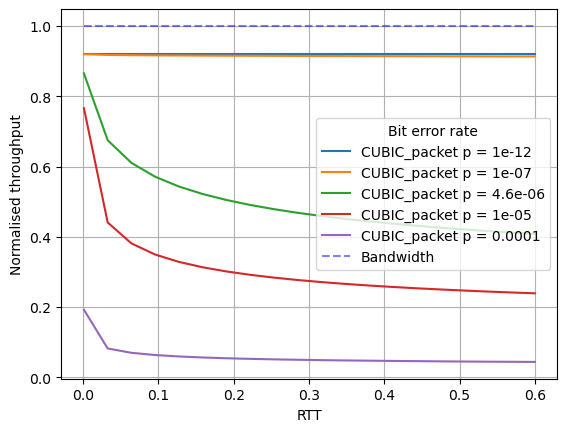

In [76]:
from ccaModels import CCA_MarkovChain_Hybla_bit, CCA_MarkovChain_CUBIC_bit
# For a bandwidth of 500Kbits, a packet size of 1500 bytes, the bandwidth in packets is 500000/(1500*8) = 41.67 packets per second 
rtts = np.linspace(0.001,0.6,20)
packet_error = np.array([1e-12, 1e-07, 4.64159e-06, 1e-05, 0.0001])
throughputs = np.zeros((2*len(packet_error),len(rtts)))
for k, err in enumerate(packet_error):
    for i, rtt in enumerate(rtts):
        #wireless = CCA_MarkovChain_Hybla_bit(packet_err=err,beta=0.7,N=100,C = 41,RTT_real=rtt, RTT0=0.05)
        cubic = CCA_MarkovChain_CUBIC_bit(packet_err=err*(1500*8),beta=0.7,N=100,C = 41,RTT_real=rtt)
        #throughputs[2*k,i] = wireless.avg_throughput()
        throughputs[2*k+1,i] = cubic.avg_throughput()
for k,err in enumerate(packet_error):
    #plt.plot(rtts,throughputs[2*k,:], label = "Hybla_packet p = {}".format(err))
    plt.plot(rtts,throughputs[2*k+1,:], label = "CUBIC_packet p = {}".format(err))
plt.plot(rtts,np.ones(len(rtts)),linestyle='--',color='blue', alpha = 0.5,label="Bandwidth")
plt.legend(title='Bit error rate')
plt.grid()
plt.xlabel(r"RTT")
plt.ylabel(r'Normalised throughput')
plt.show()
# Notice that the throughput of hybla is not affected by the rtt (appart from the first value which must be an error of some kind)
# Cubic is affected by rtt (as we can see with the line p = 0.0001)

In [77]:
print(results[bw].keys())

dict_keys([1e-12, 2.15443e-09, 1e-07, 4.64159e-06, 1e-05, 0.0001, 0.01])
